'

# Amirhossein Mesbah - Part 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.io as spio
from scipy import signal
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
import glob

# 2. Data Exploring: Discrete-Time Signals

In [5]:
cond = spio.loadmat('abolqasemi dataset\cond.mat')
cond = cond['Cond'].reshape(1, -1)

## Raster Plot

In [85]:
def raster_plot(data_path, second=False):
    neuron = spio.loadmat(data_path)
    neuron = neuron['su']
    if neuron.shape[0] != 0:
        if second == True:
            ra = 2
        else:
            ra =1
        for i in range(ra):
            spikes = neuron[0][i]

            fig, ax = plt.subplots(figsize = (20, 10))

            # Loop to plot raster for each trial
            for trial in range(len(spikes)):
                spike_times = [i for i, x in enumerate(spikes[trial]) if x == 1]
                ax.vlines(spike_times, trial - 0.5, trial + 0.5)

            ax.set_xlim([0, 8000])
            ax.set_xlabel('Time (ms)')

            # specify tick marks and label label y axis
            ax.set_yticks(range(1,len(spikes), 49))
            ax.set_ylabel('Trial Number')

            ax.set_title(f'Neuronal Spike Times {data_path} , data {i}') 


            plt.show()

    

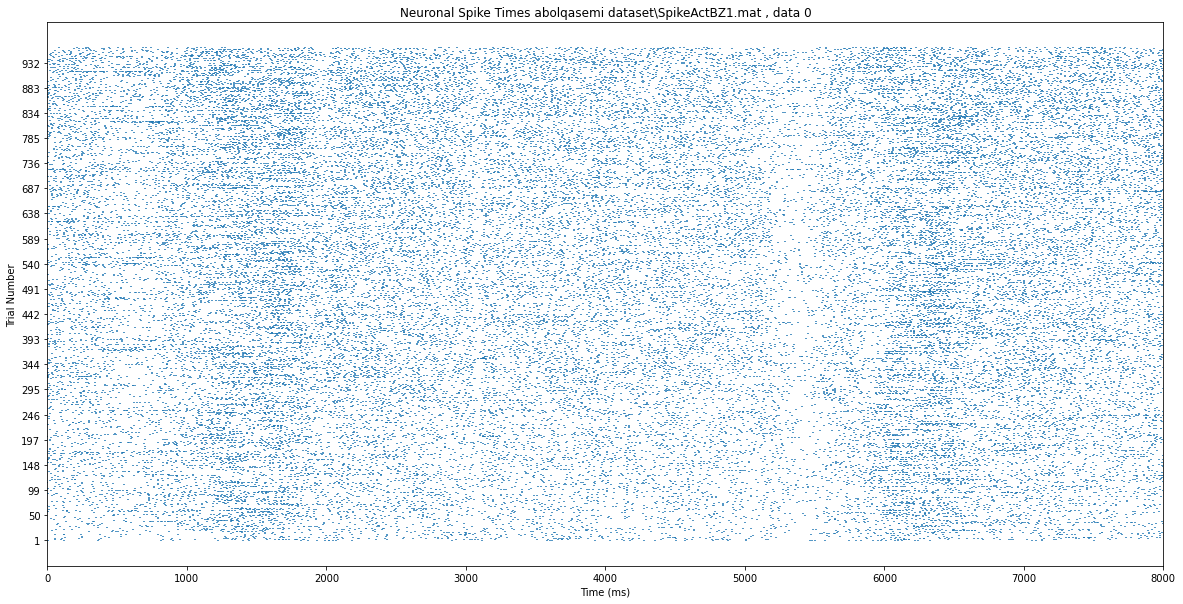

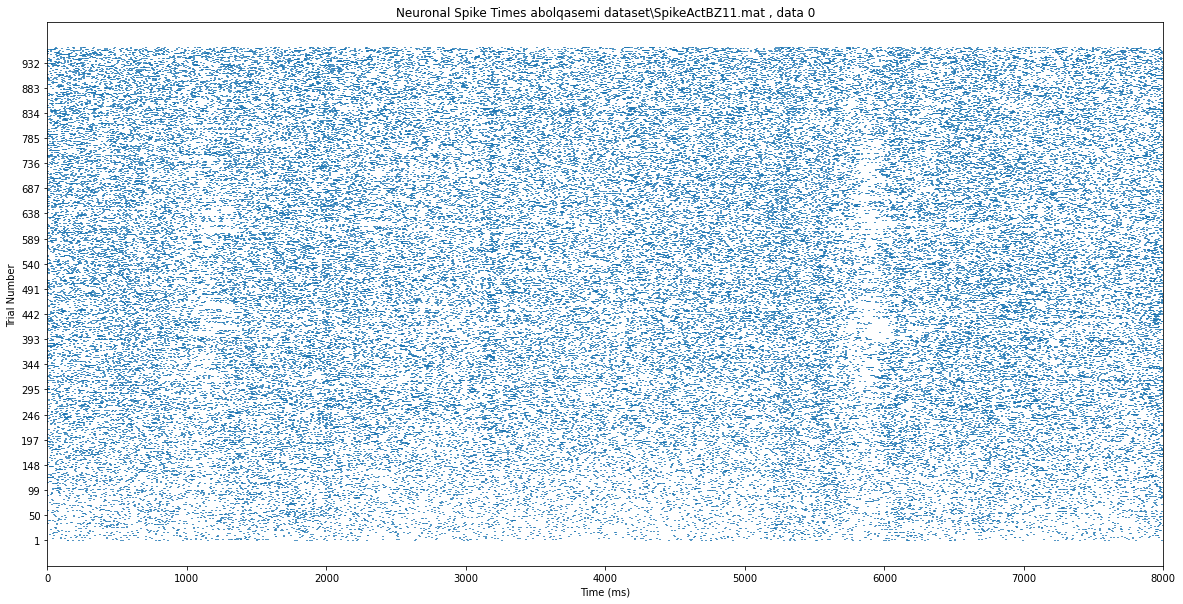

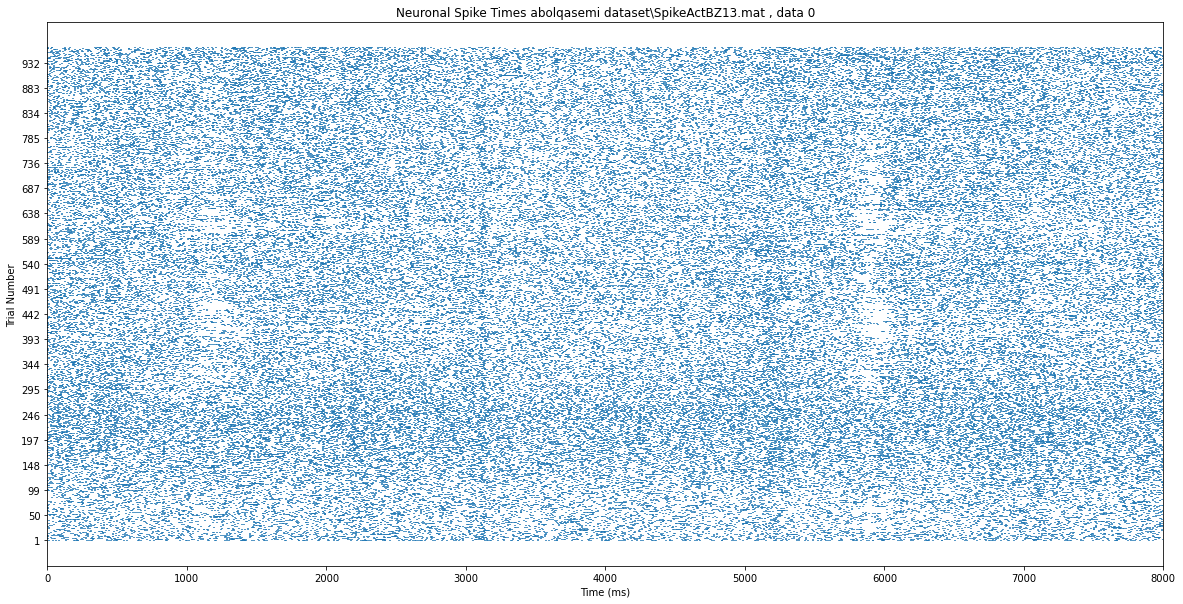

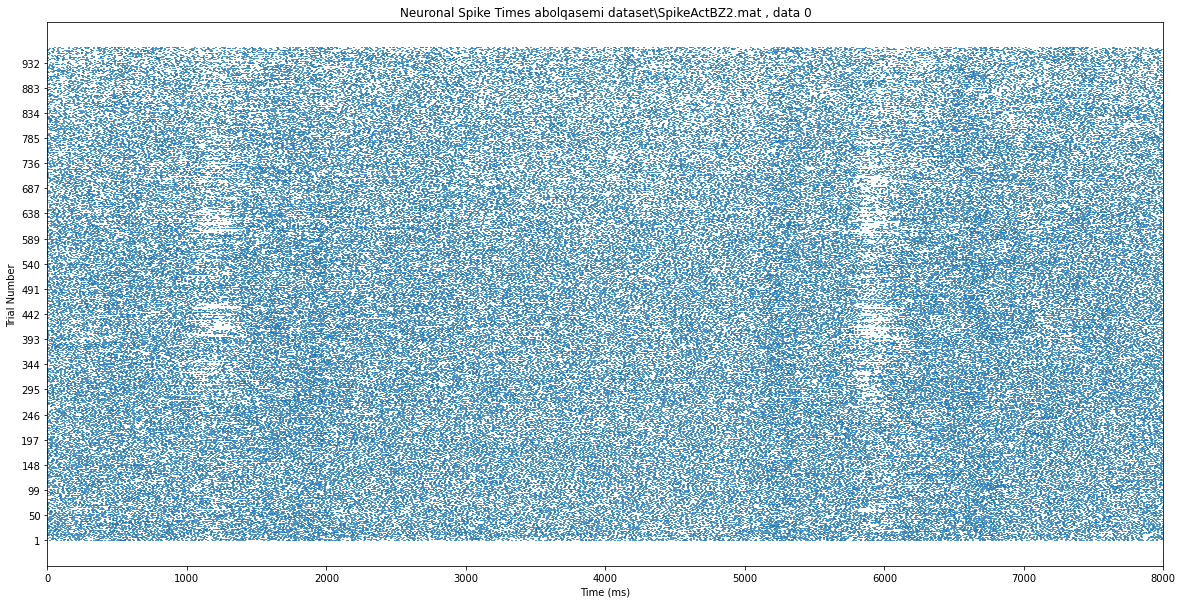

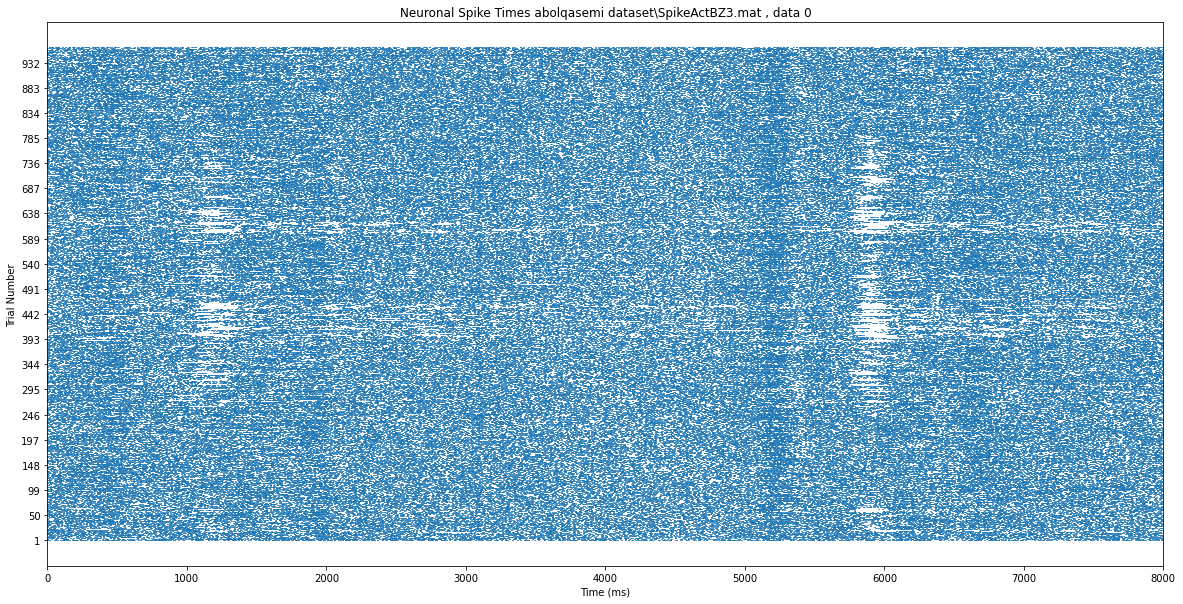

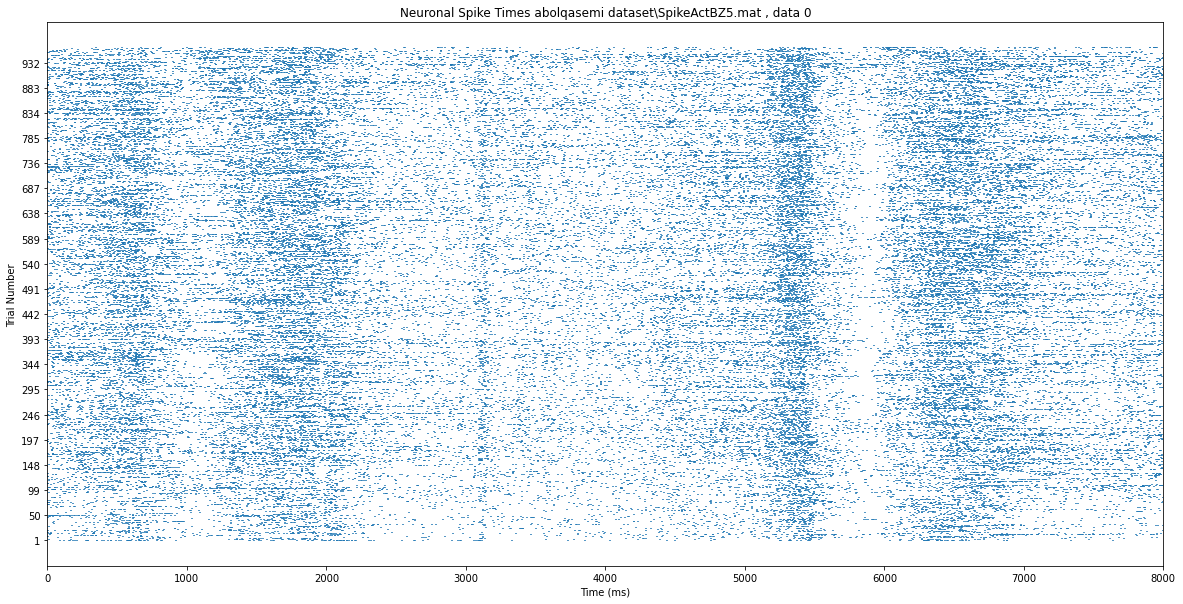

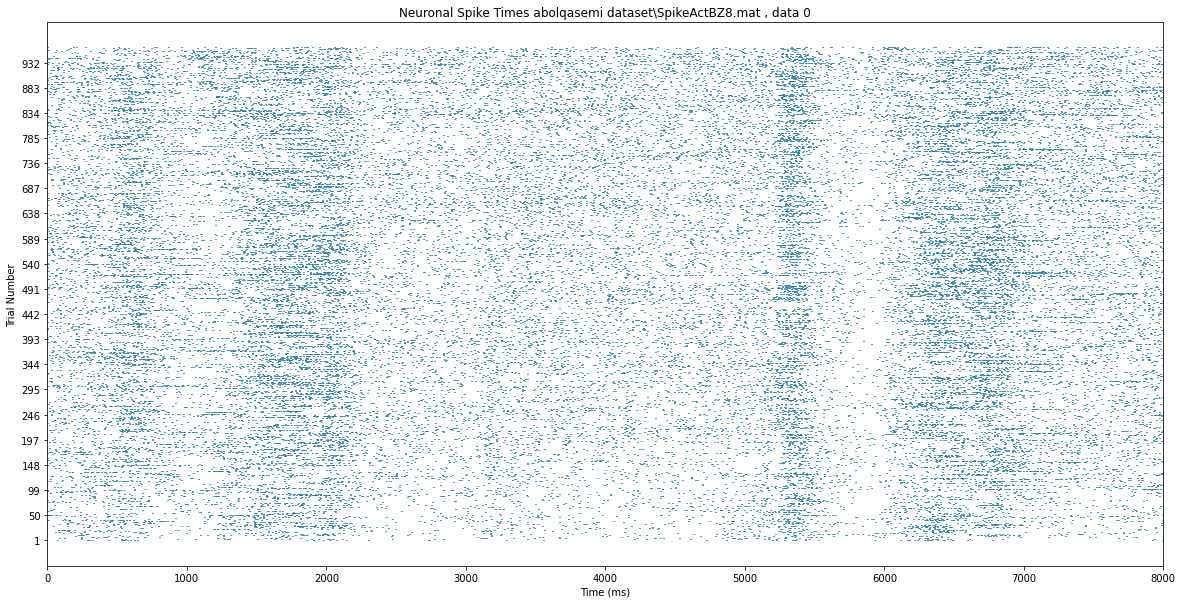

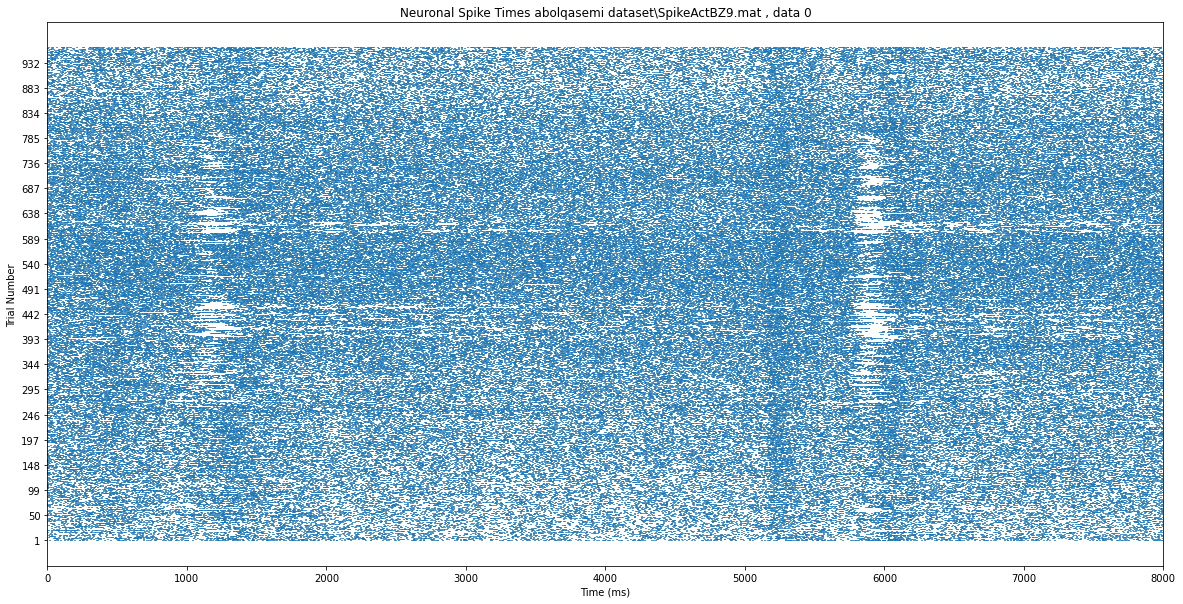

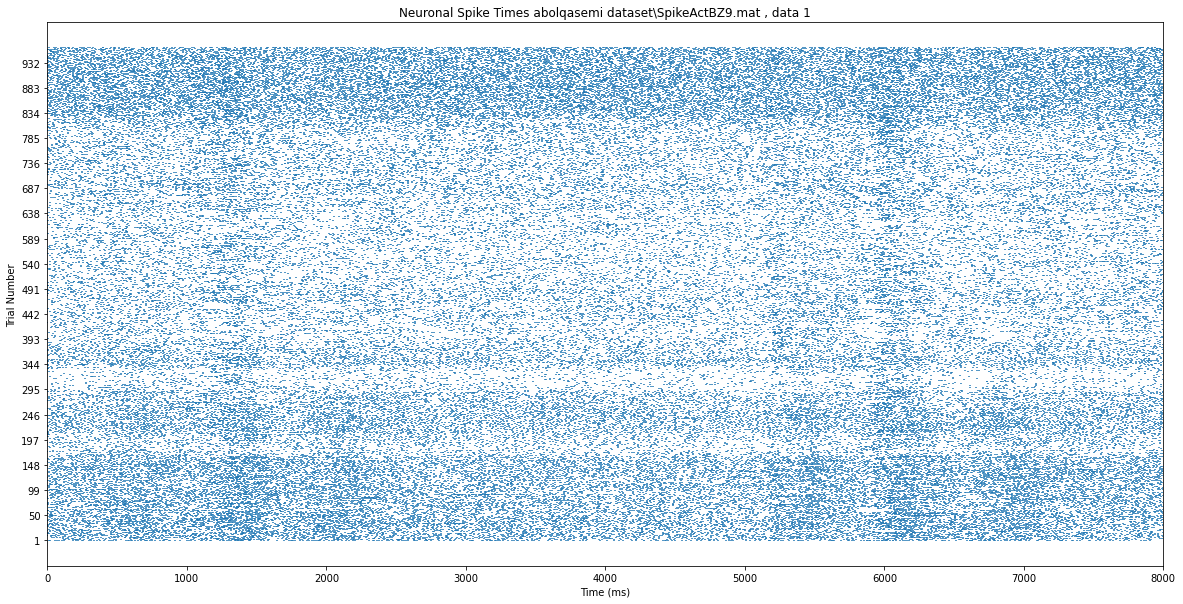

In [86]:
files = glob.glob('abolqasemi dataset\Spike*.mat')
count = 1
for file in files:
    if count == 16:
        raster_plot(file, True)
    else:
        raster_plot(file, False)
    count +=1
        
    

## PSTH

In [4]:
new_cond = cond[0].copy()
for i in range(1,9):
    new_cond[new_cond==i+8] = i

In [7]:
stim_indexes = []
for i in range(1, 9):
    stim_indexes.append([index for index in range(len(new_cond)) if new_cond[index]==i])

In [8]:
import glob
def plot_psth(stim_num):
    files = glob.glob('abolqasemi dataset\Spike*.mat')
    stims=[]
    for file in files:
        neuron = spio.loadmat(file)
        neuron = neuron['su']
        if neuron.shape[0] != 0:
            for n in neuron[0]:
                print(file)
                stim =np.zeros((150, 8000))
                spikes = n
                #print(spikes[stim_indexes[stim_num], :].shape)
                stim = spikes[stim_indexes[stim_num], :]
                    
                fig, ax = plt.subplots(figsize=(20,6))

                # Draw the PSTH
                ax.bar(range(stim.shape[1]), 
                        np.sum(stim, 0), width=1.0
                    )
                stims.append(stim)
                # Make pretty
                ax.set_title(f'Peri-Stimulus Time Histogram (PSTH) for stimulus {stim_num+1}')
                ax.set_xlabel('Time (ms)')
                ax.set_ylabel('Num. spike occurrences at this time')

                plt.show()
            
    
    return stims
    

abolqasemi dataset\SpikeActBZ1.mat


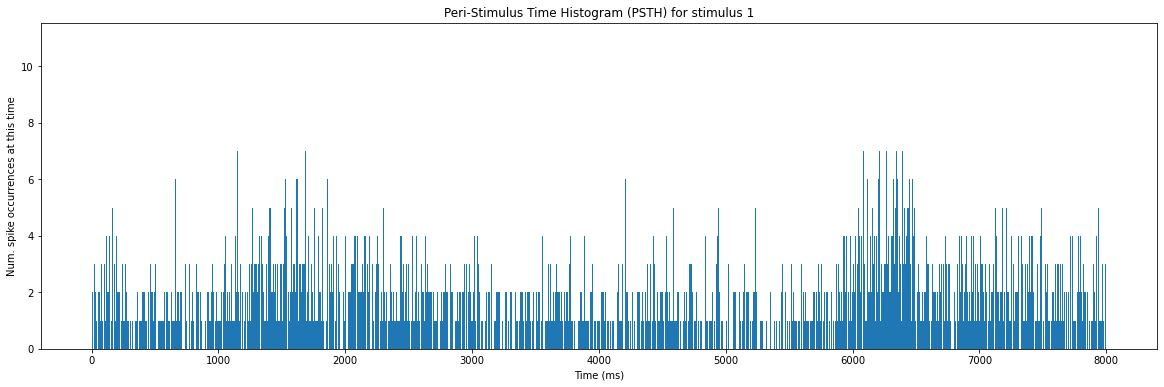

abolqasemi dataset\SpikeActBZ11.mat


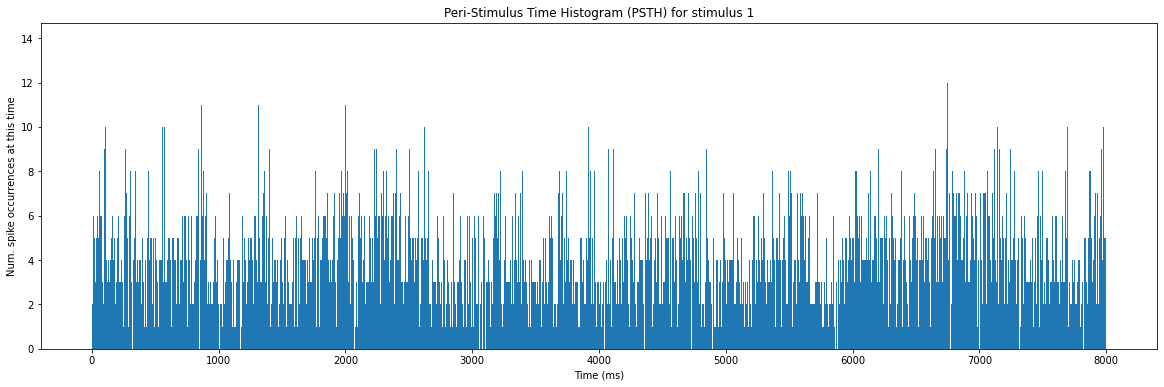

abolqasemi dataset\SpikeActBZ13.mat


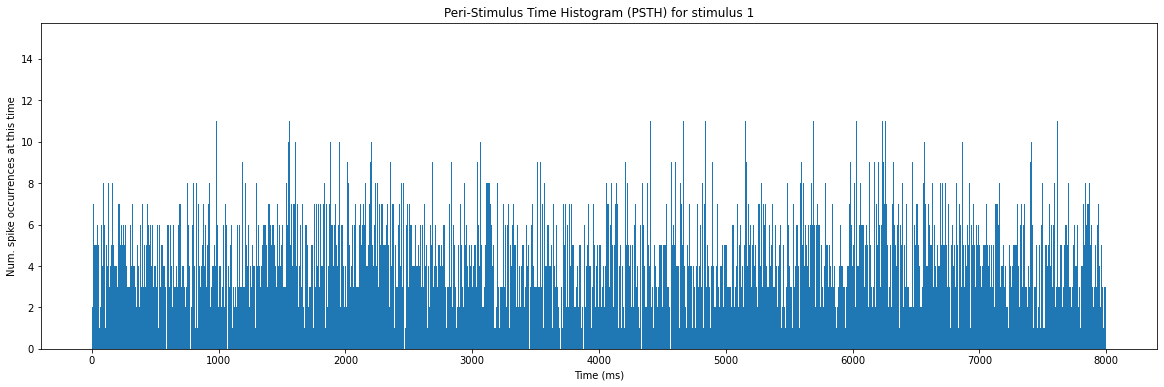

abolqasemi dataset\SpikeActBZ2.mat


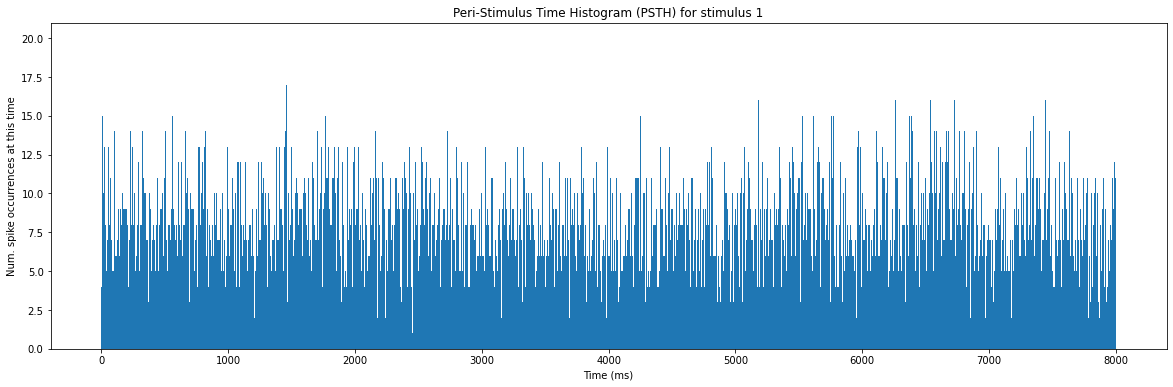

abolqasemi dataset\SpikeActBZ3.mat


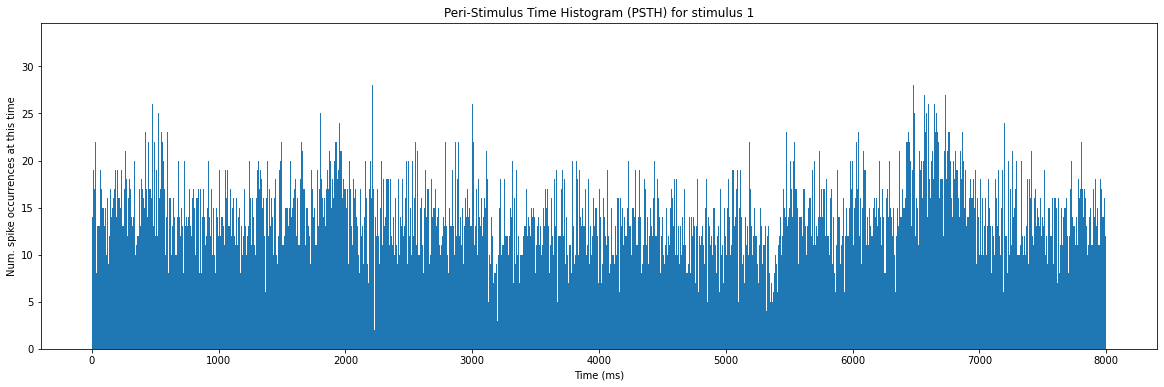

abolqasemi dataset\SpikeActBZ5.mat


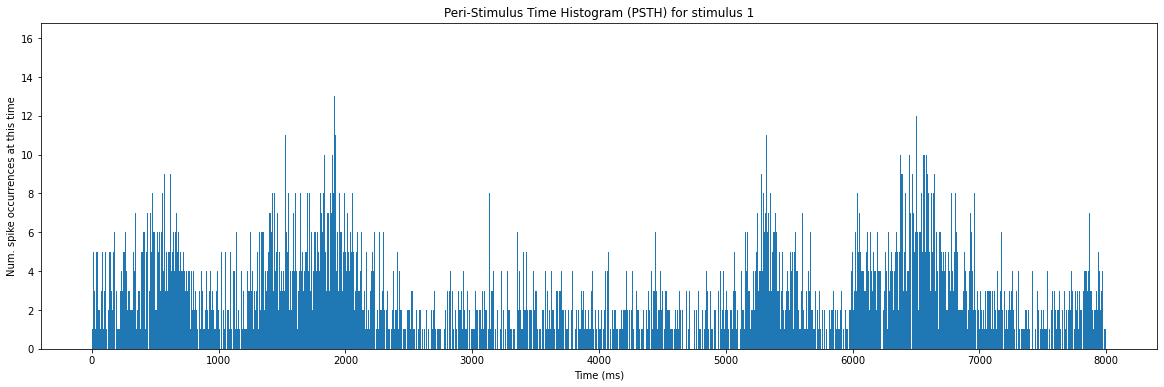

abolqasemi dataset\SpikeActBZ8.mat


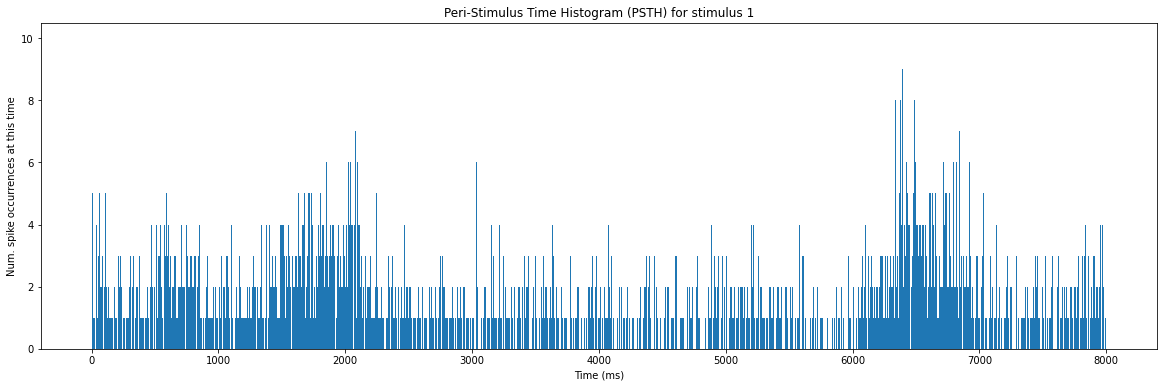

abolqasemi dataset\SpikeActBZ9.mat


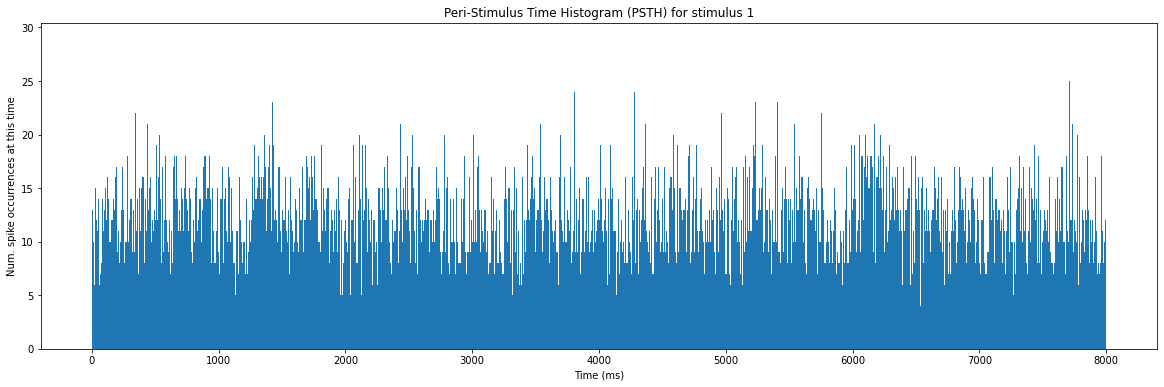

abolqasemi dataset\SpikeActBZ9.mat


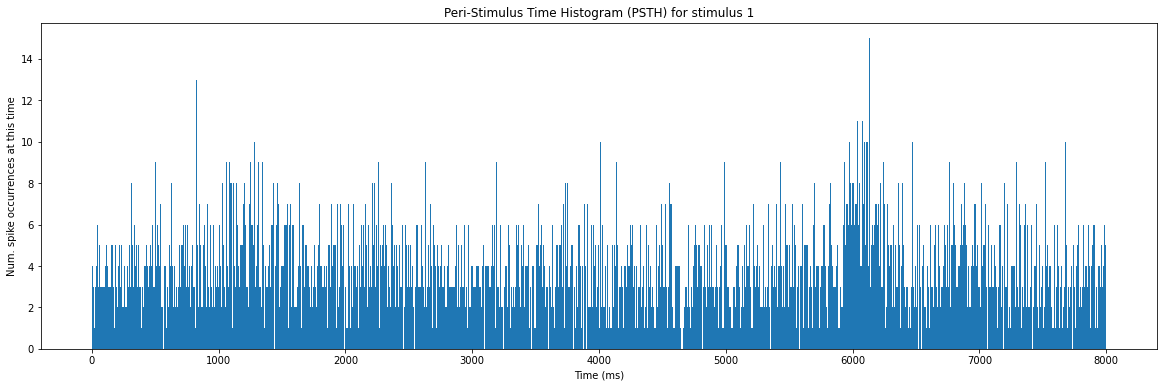

abolqasemi dataset\SpikeActBZ1.mat


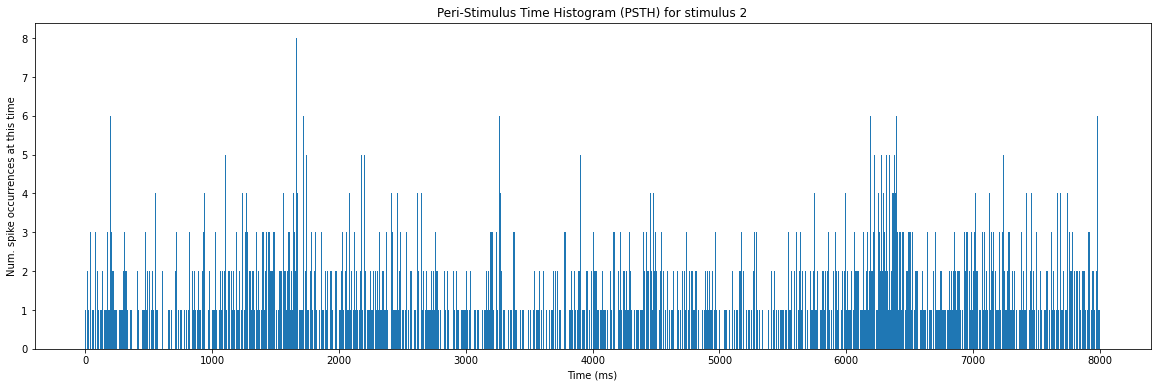

abolqasemi dataset\SpikeActBZ11.mat


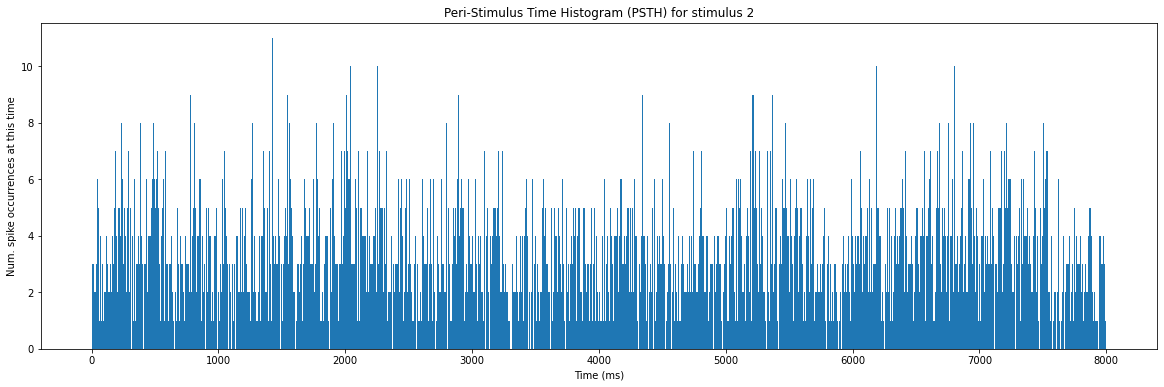

abolqasemi dataset\SpikeActBZ13.mat


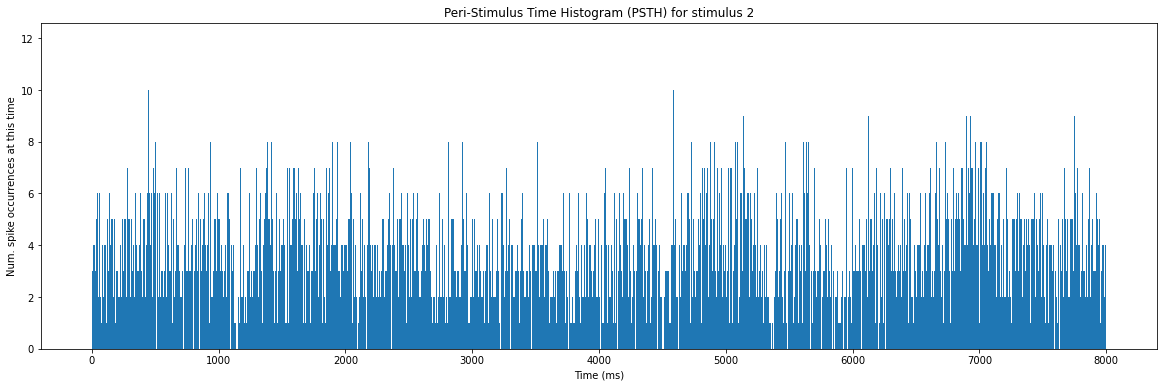

abolqasemi dataset\SpikeActBZ2.mat


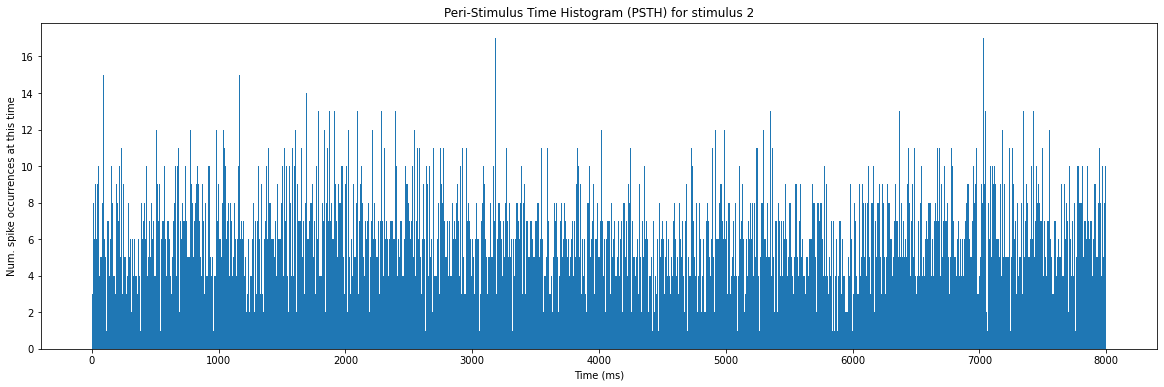

abolqasemi dataset\SpikeActBZ3.mat


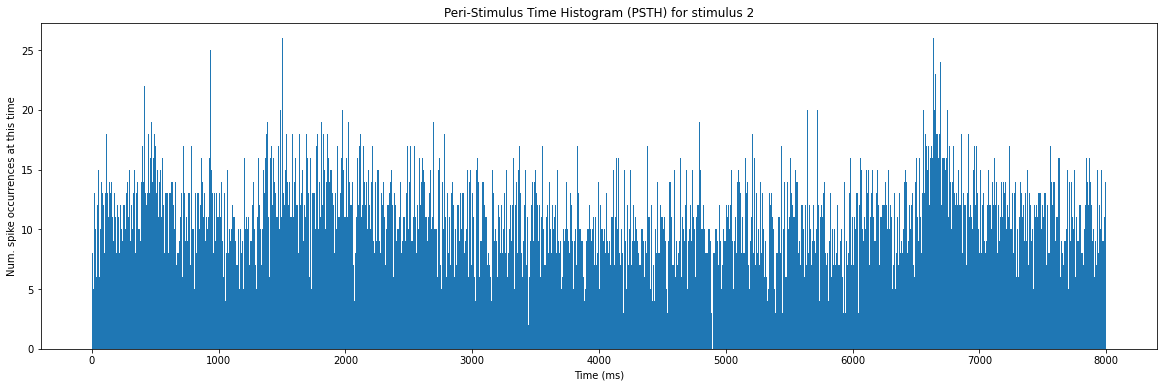

abolqasemi dataset\SpikeActBZ5.mat


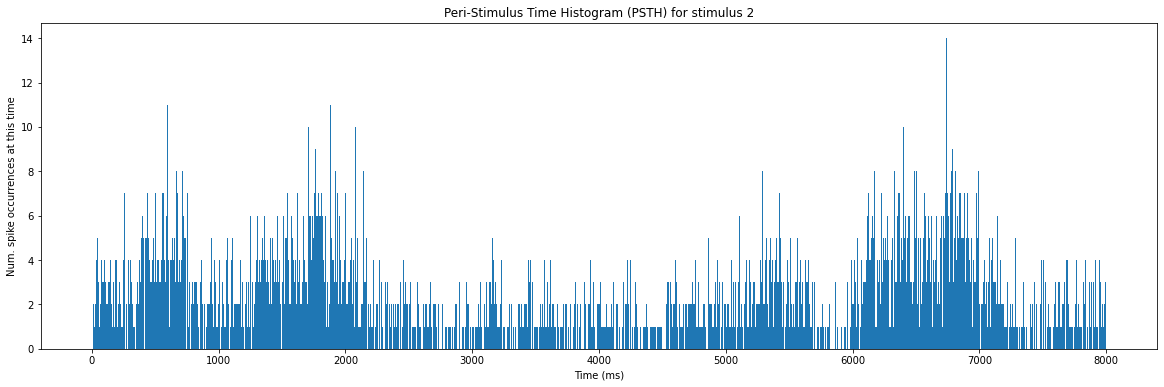

abolqasemi dataset\SpikeActBZ8.mat


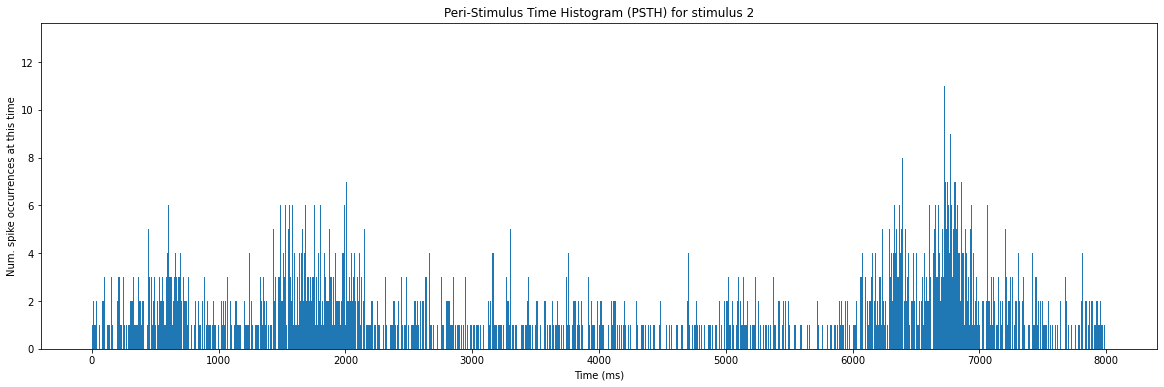

abolqasemi dataset\SpikeActBZ9.mat


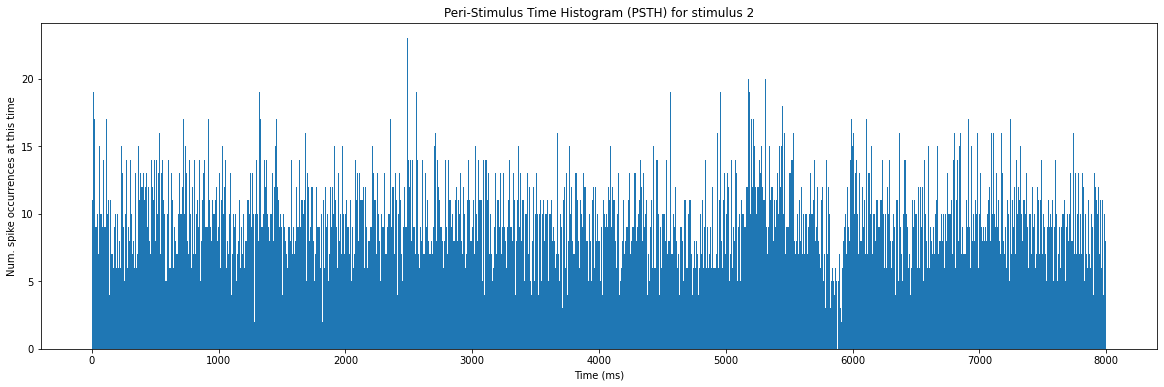

abolqasemi dataset\SpikeActBZ9.mat


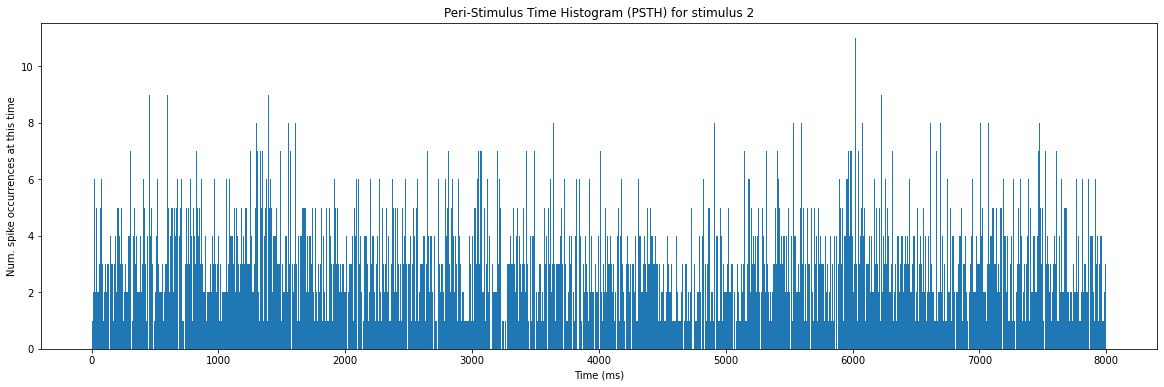

abolqasemi dataset\SpikeActBZ1.mat


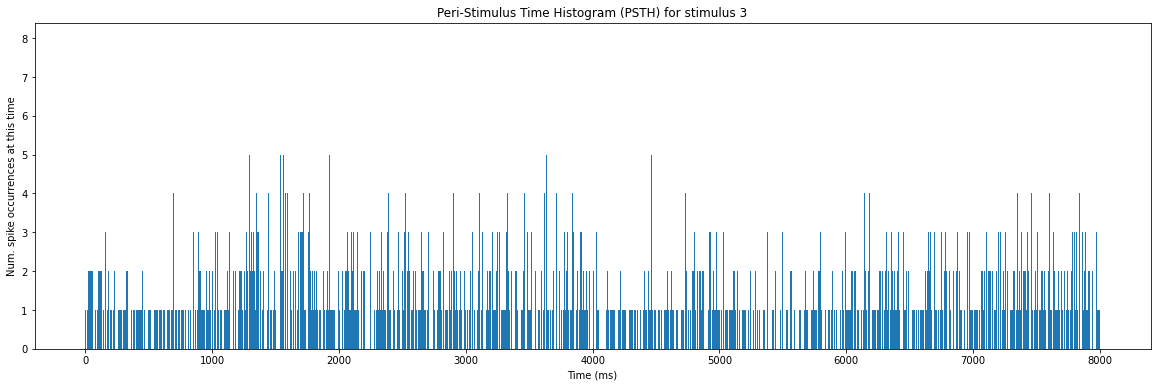

abolqasemi dataset\SpikeActBZ11.mat


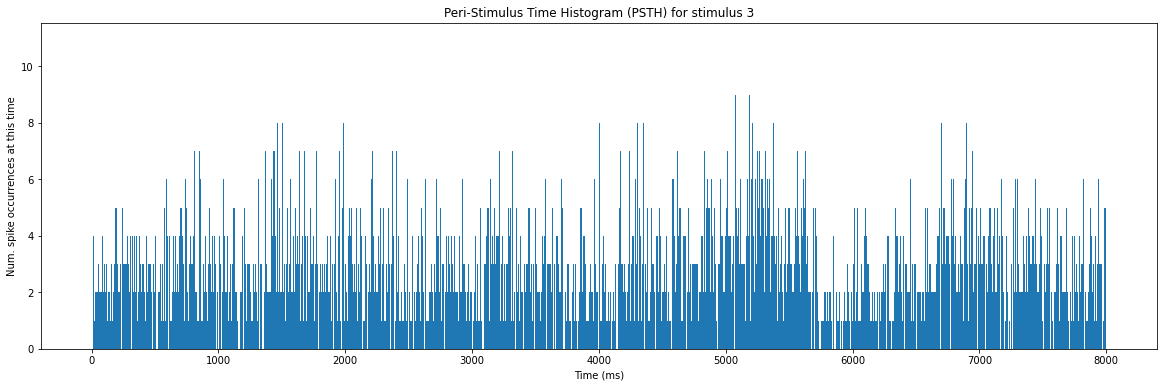

abolqasemi dataset\SpikeActBZ13.mat


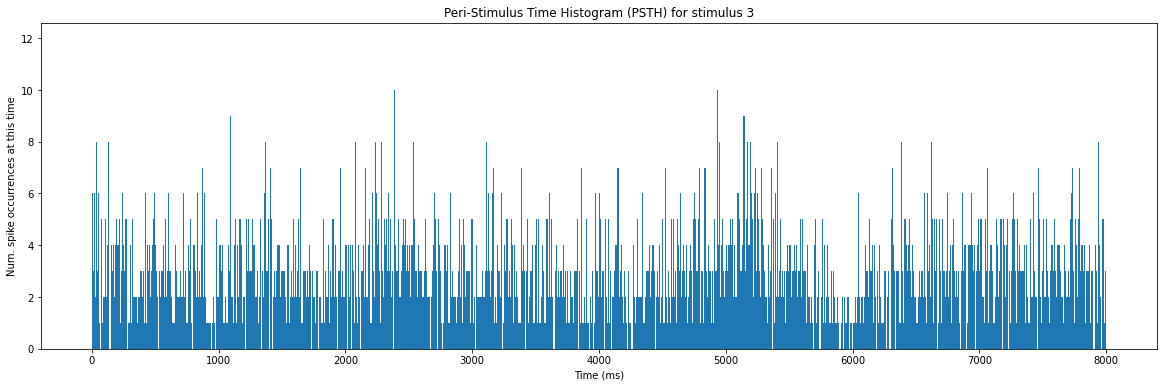

abolqasemi dataset\SpikeActBZ2.mat


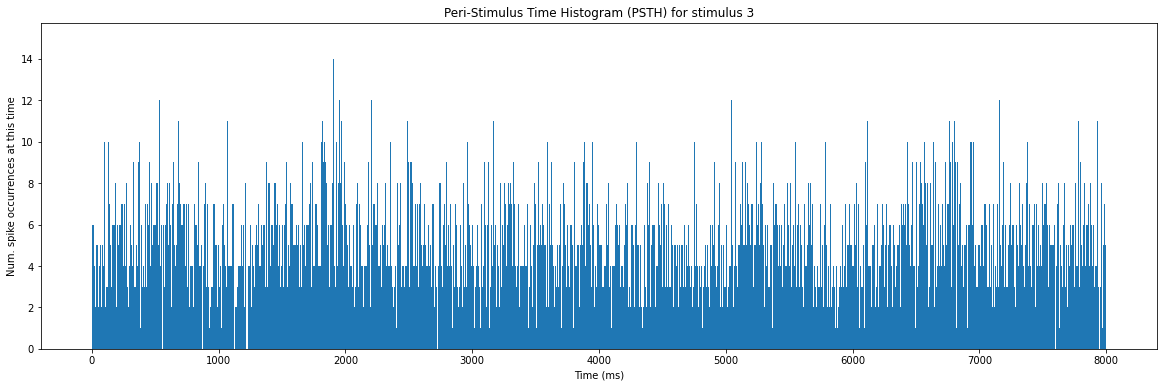

abolqasemi dataset\SpikeActBZ3.mat


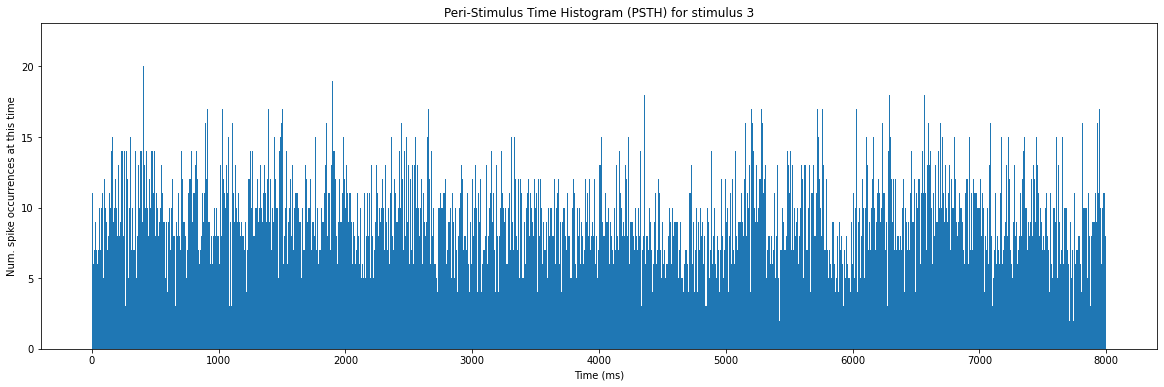

abolqasemi dataset\SpikeActBZ5.mat


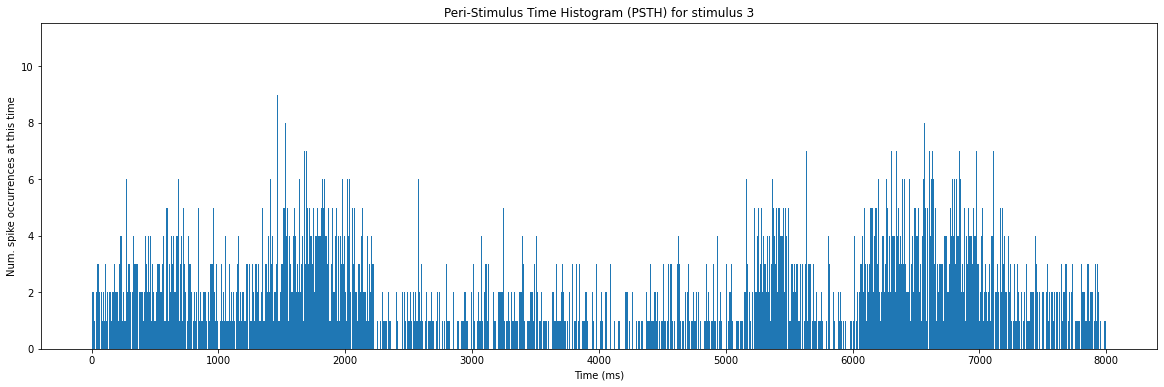

abolqasemi dataset\SpikeActBZ8.mat


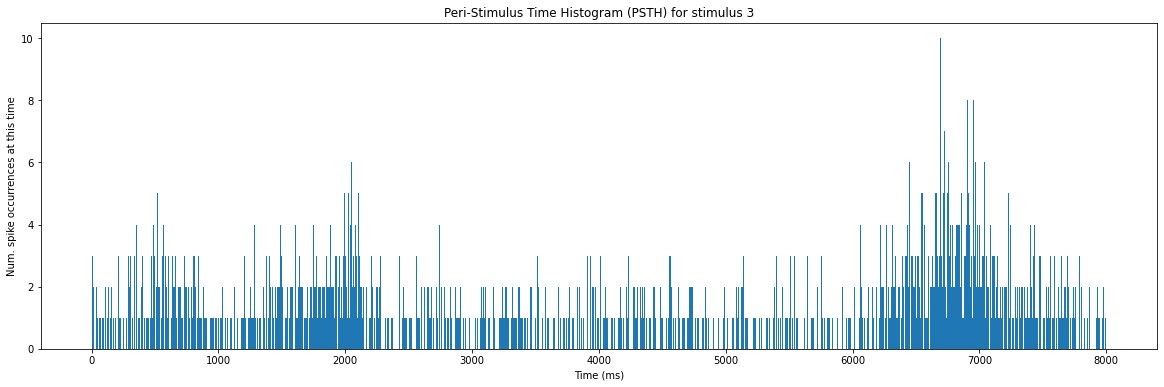

abolqasemi dataset\SpikeActBZ9.mat


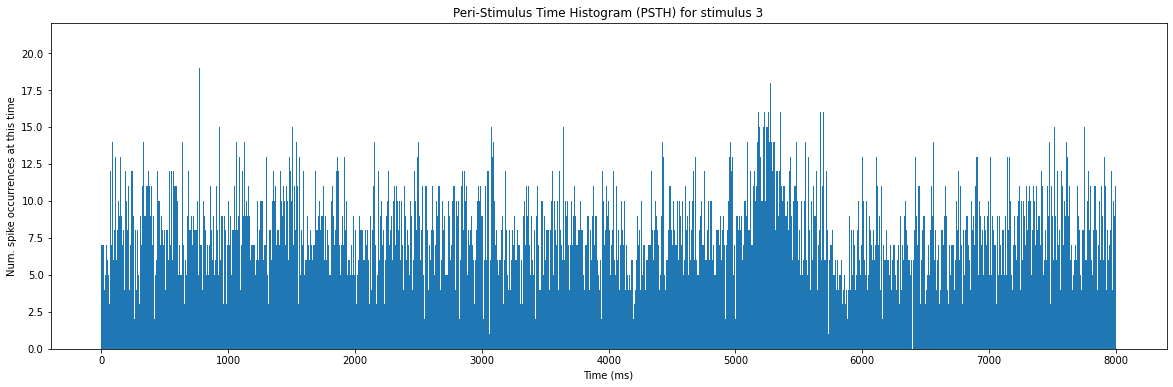

abolqasemi dataset\SpikeActBZ9.mat


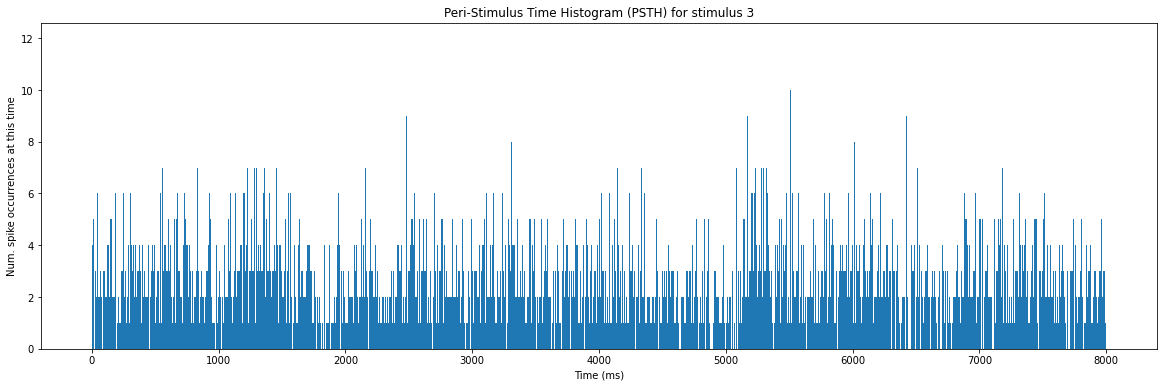

abolqasemi dataset\SpikeActBZ1.mat


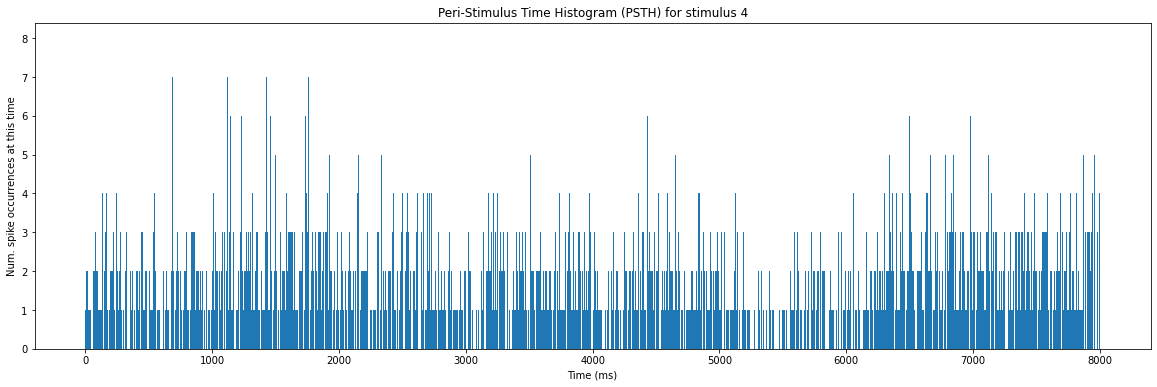

abolqasemi dataset\SpikeActBZ11.mat


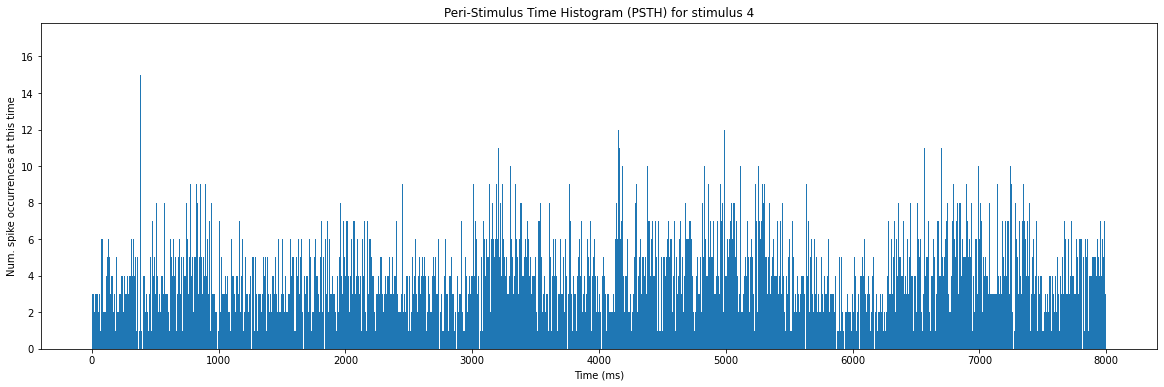

abolqasemi dataset\SpikeActBZ13.mat


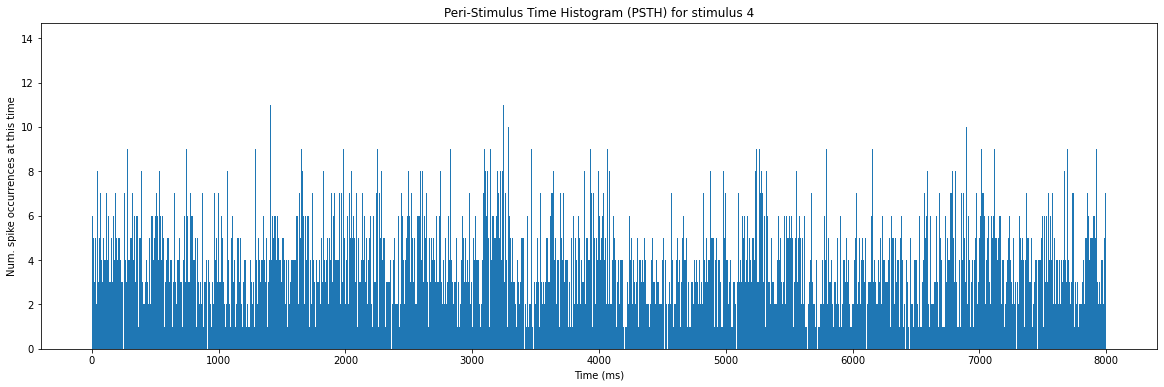

abolqasemi dataset\SpikeActBZ2.mat


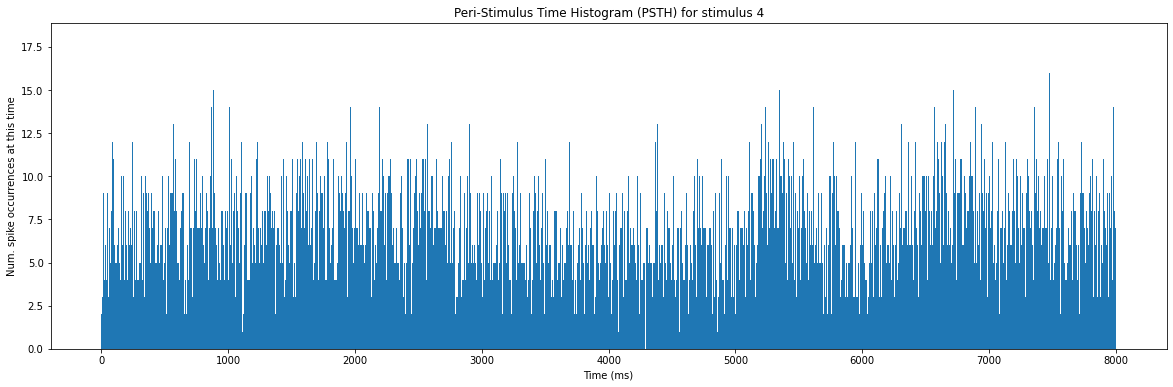

abolqasemi dataset\SpikeActBZ3.mat


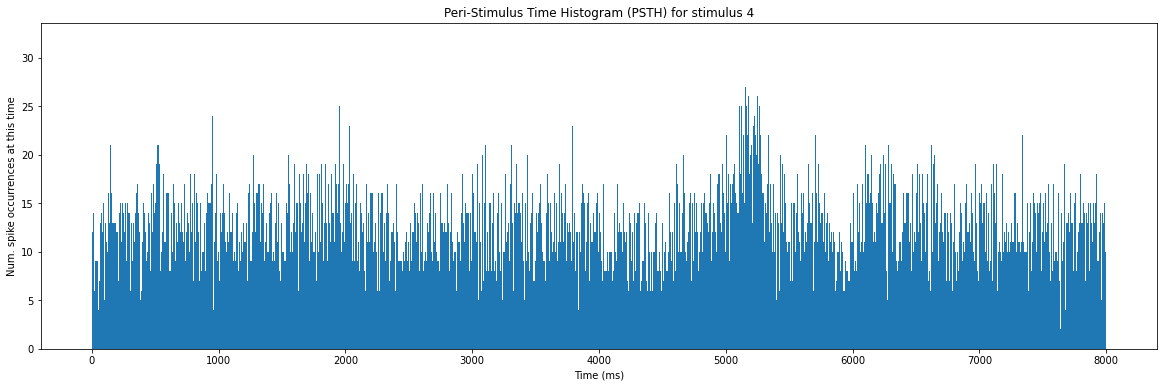

abolqasemi dataset\SpikeActBZ5.mat


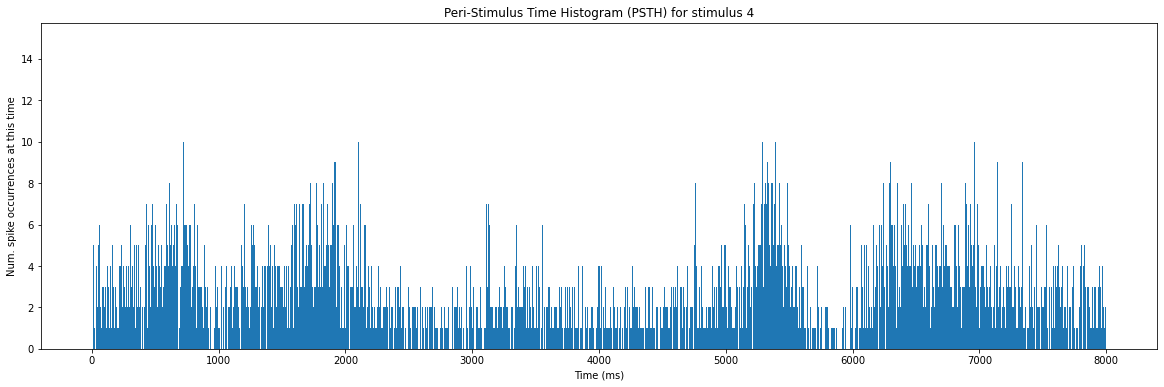

abolqasemi dataset\SpikeActBZ8.mat


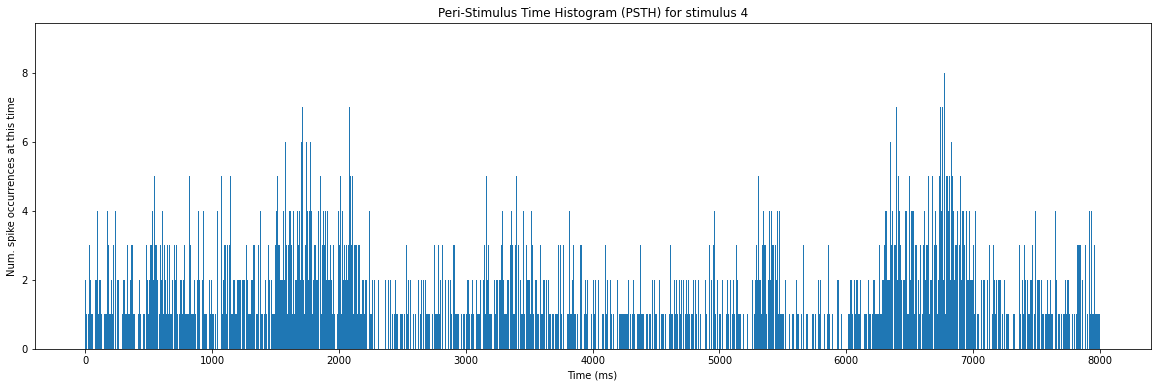

abolqasemi dataset\SpikeActBZ9.mat


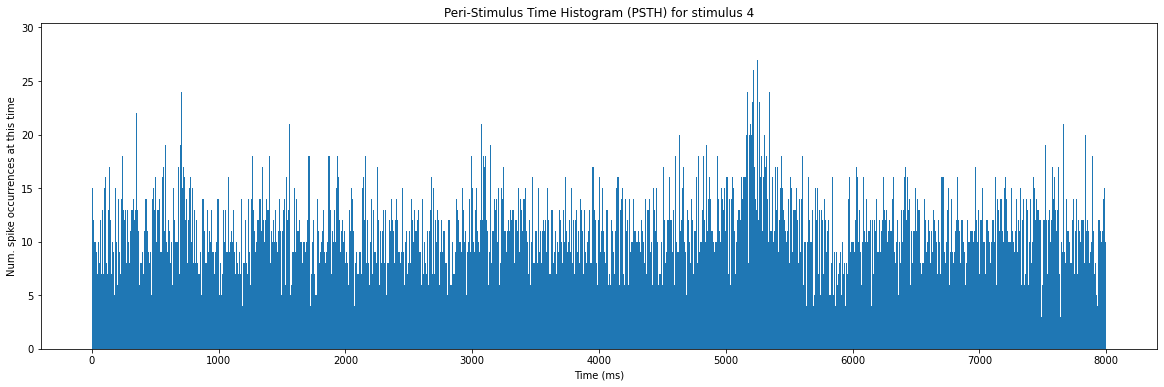

abolqasemi dataset\SpikeActBZ9.mat


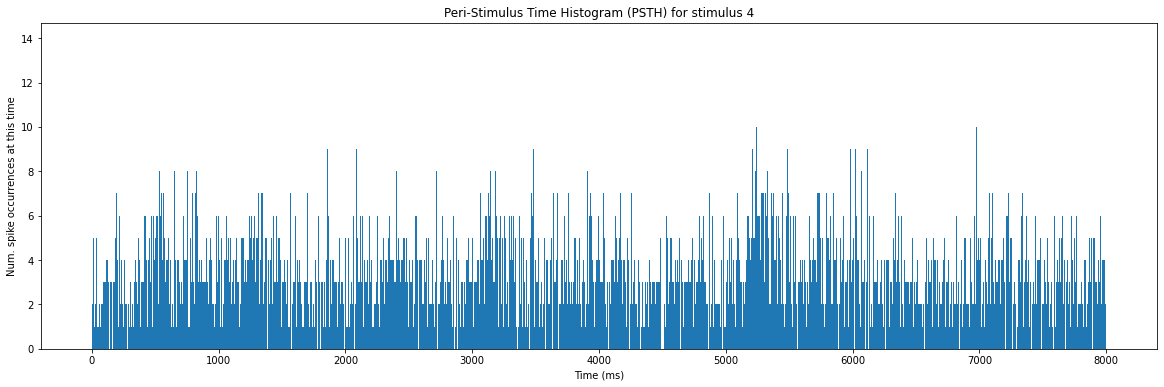

abolqasemi dataset\SpikeActBZ1.mat


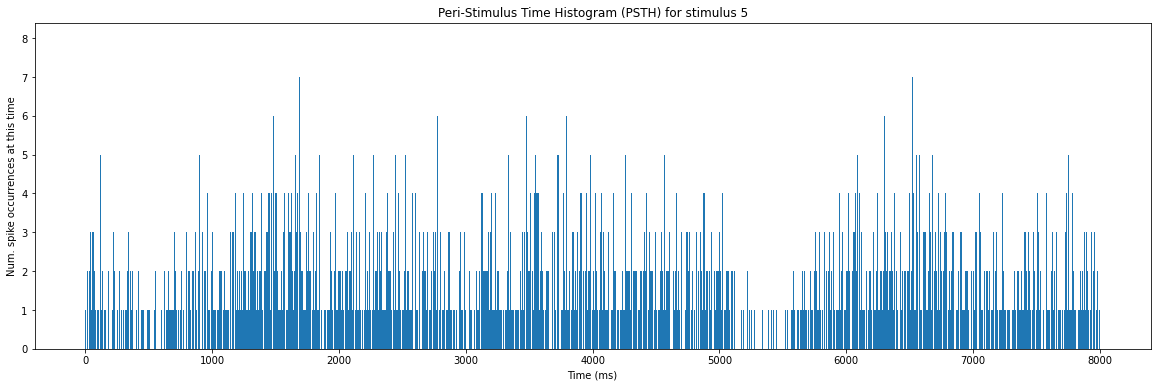

abolqasemi dataset\SpikeActBZ11.mat


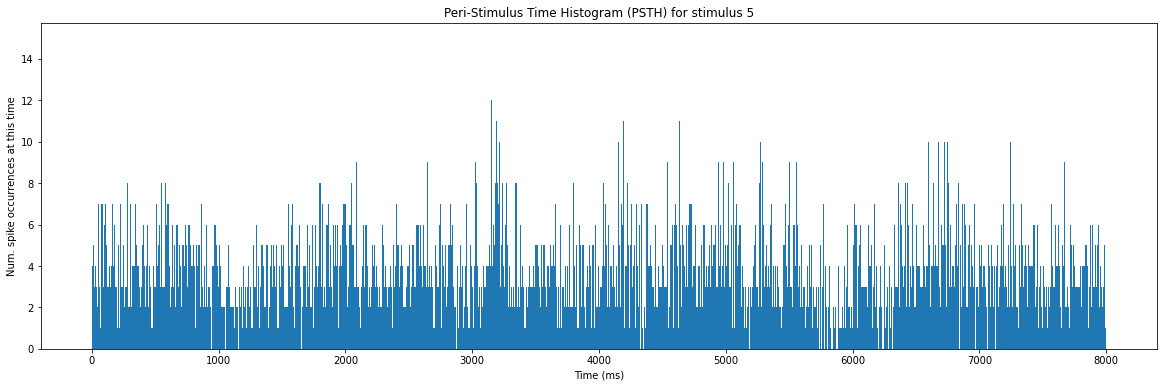

abolqasemi dataset\SpikeActBZ13.mat


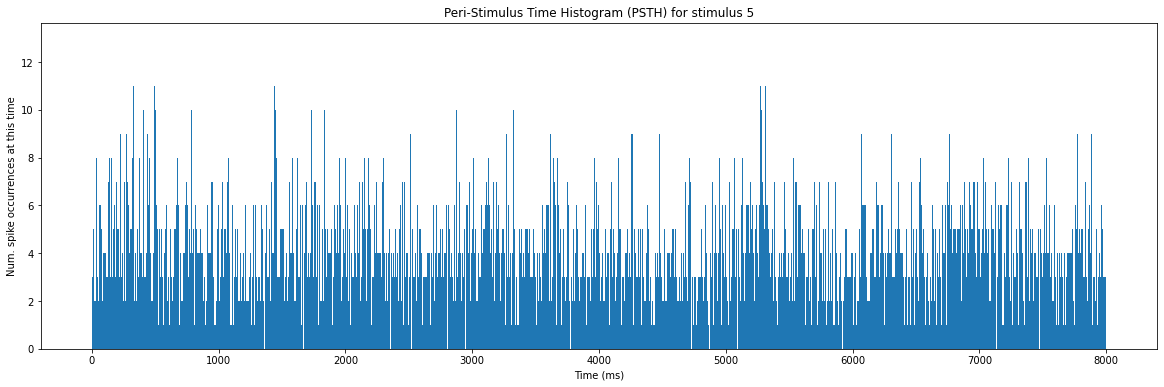

abolqasemi dataset\SpikeActBZ2.mat


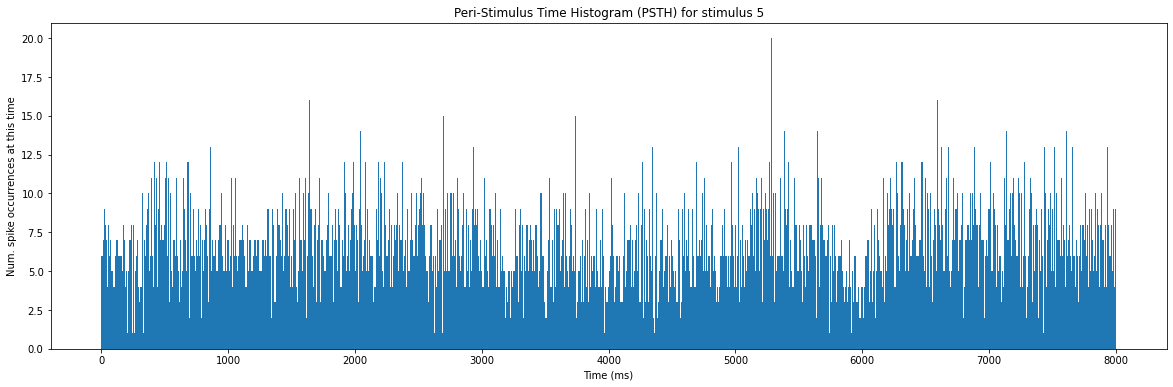

abolqasemi dataset\SpikeActBZ3.mat


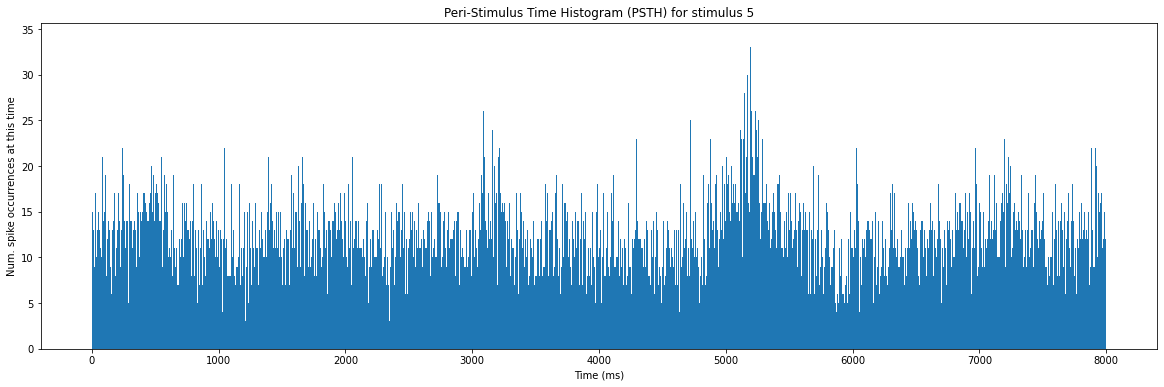

abolqasemi dataset\SpikeActBZ5.mat


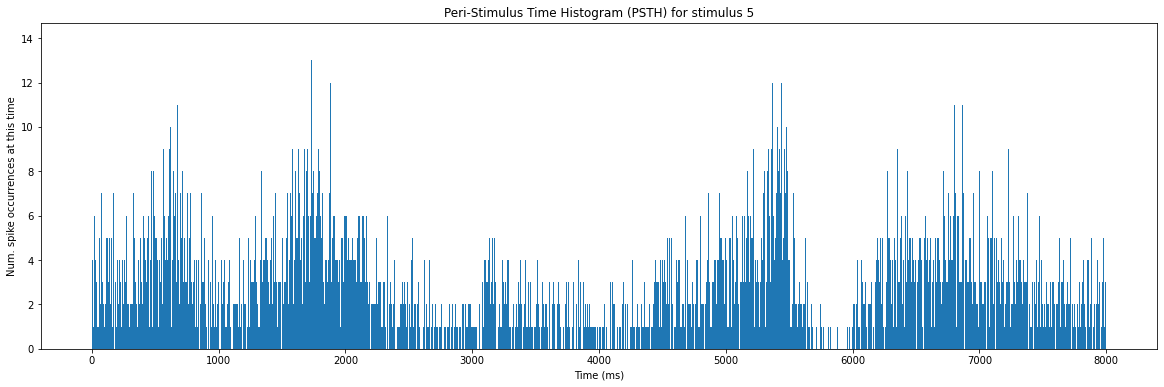

abolqasemi dataset\SpikeActBZ8.mat


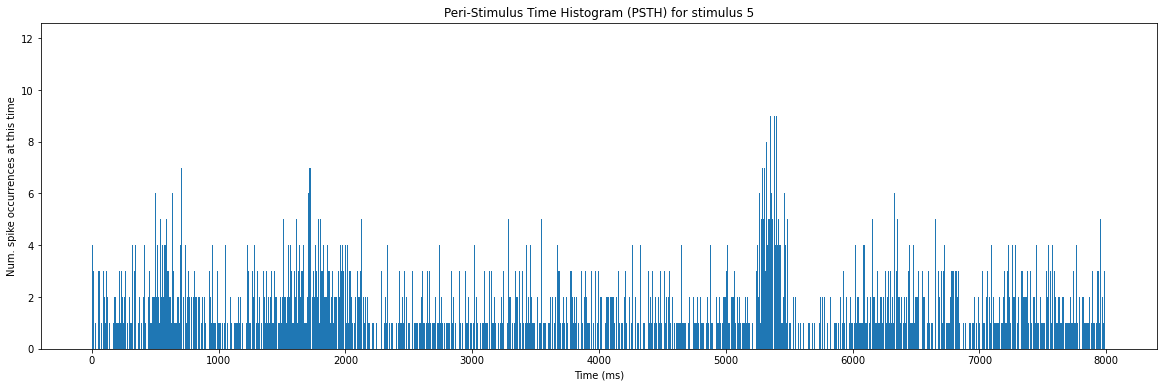

abolqasemi dataset\SpikeActBZ9.mat


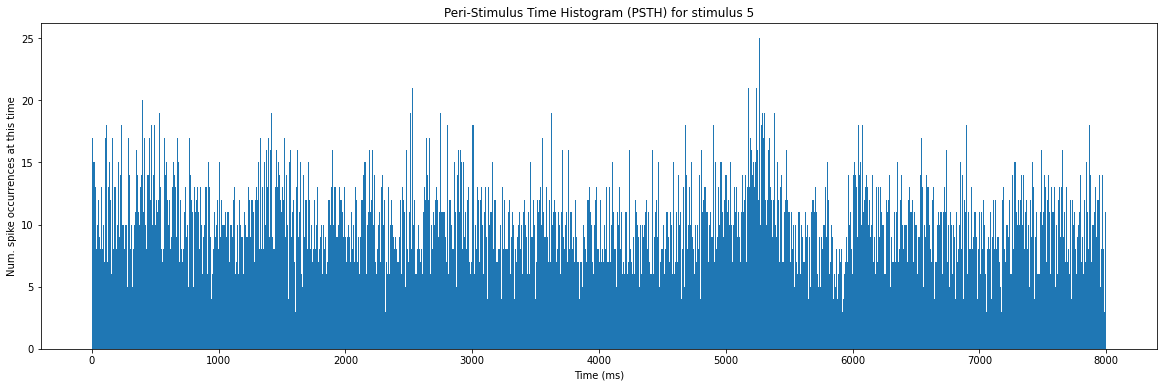

abolqasemi dataset\SpikeActBZ9.mat


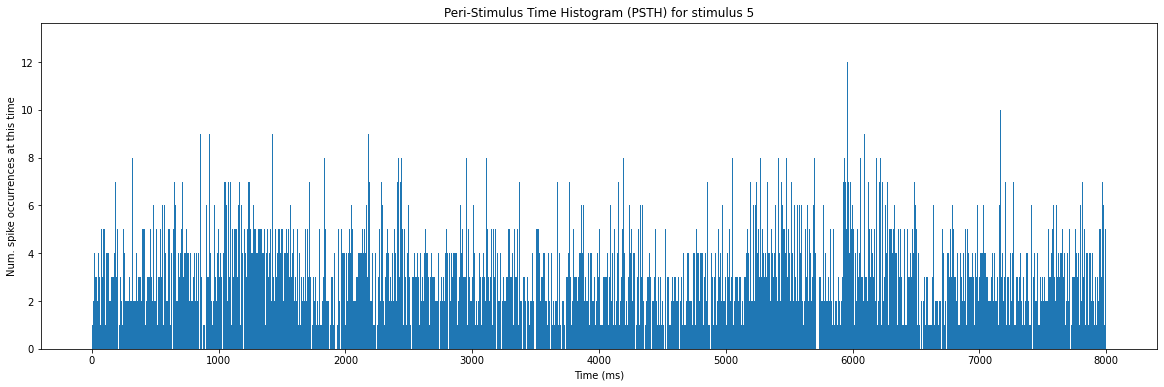

abolqasemi dataset\SpikeActBZ1.mat


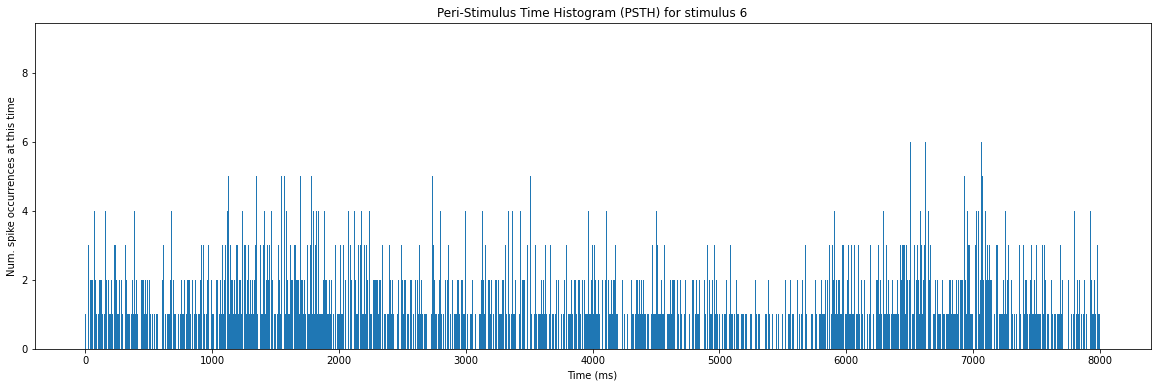

abolqasemi dataset\SpikeActBZ11.mat


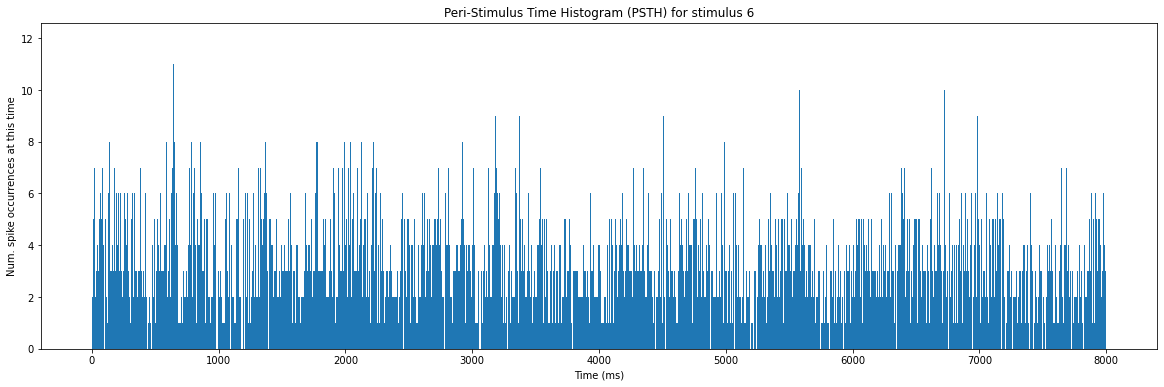

abolqasemi dataset\SpikeActBZ13.mat


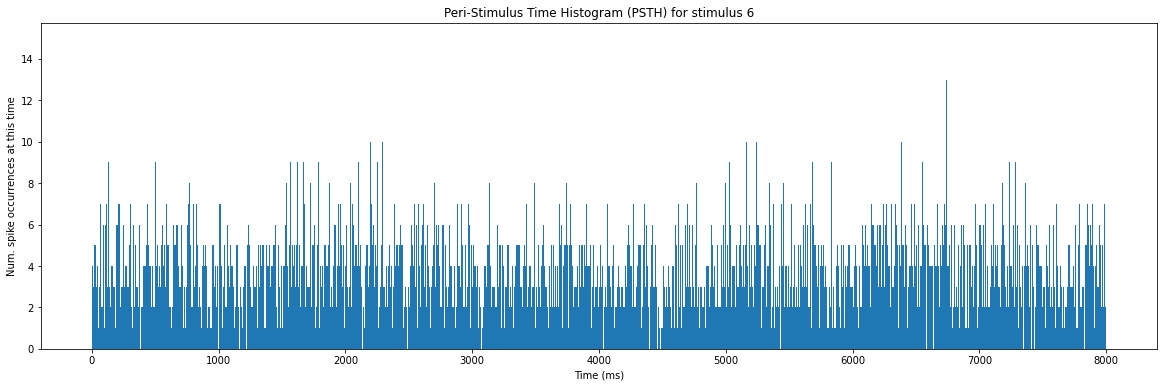

abolqasemi dataset\SpikeActBZ2.mat


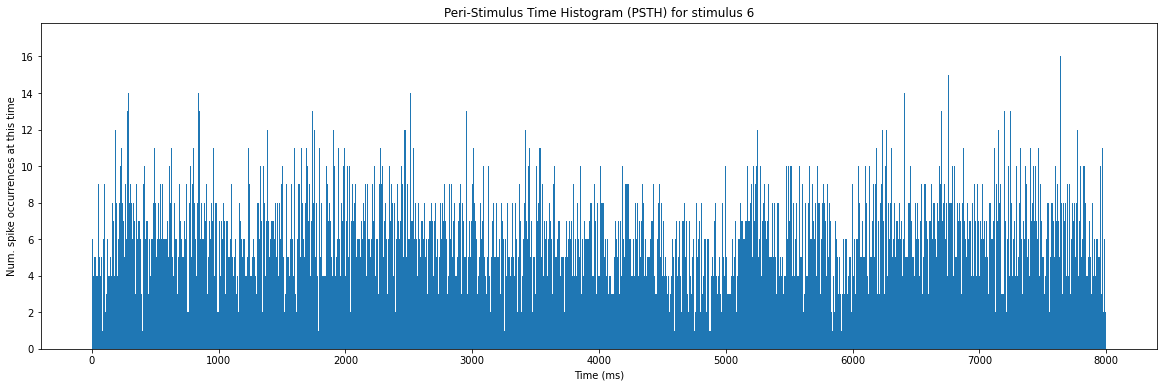

abolqasemi dataset\SpikeActBZ3.mat


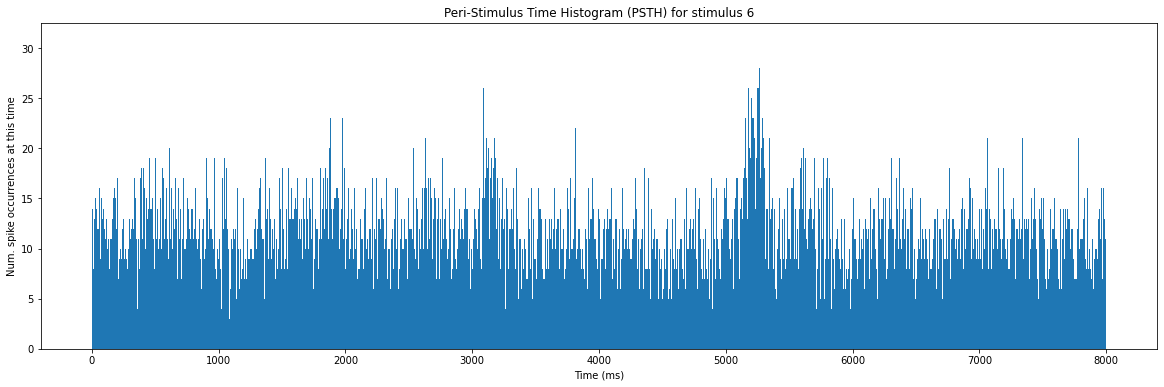

abolqasemi dataset\SpikeActBZ5.mat


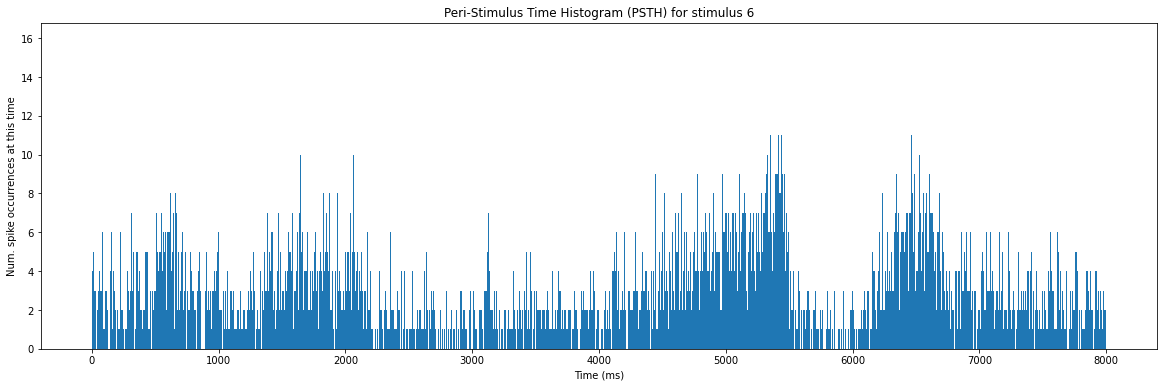

abolqasemi dataset\SpikeActBZ8.mat


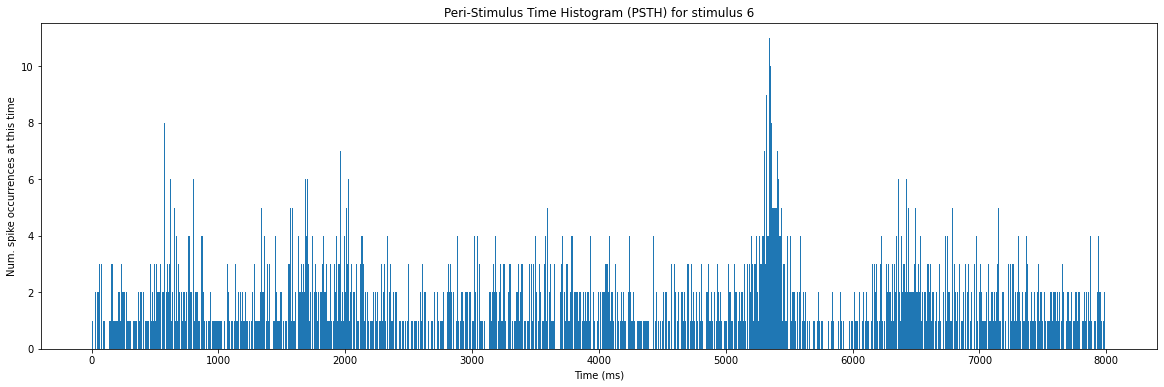

abolqasemi dataset\SpikeActBZ9.mat


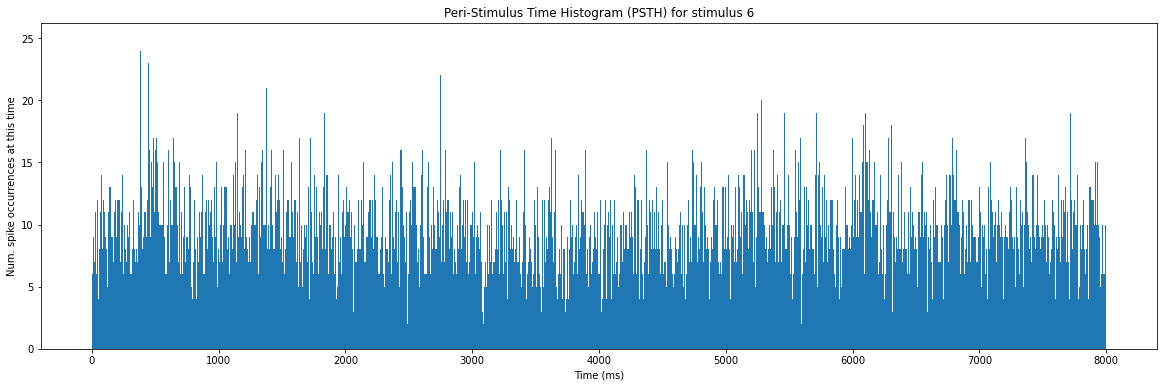

abolqasemi dataset\SpikeActBZ9.mat


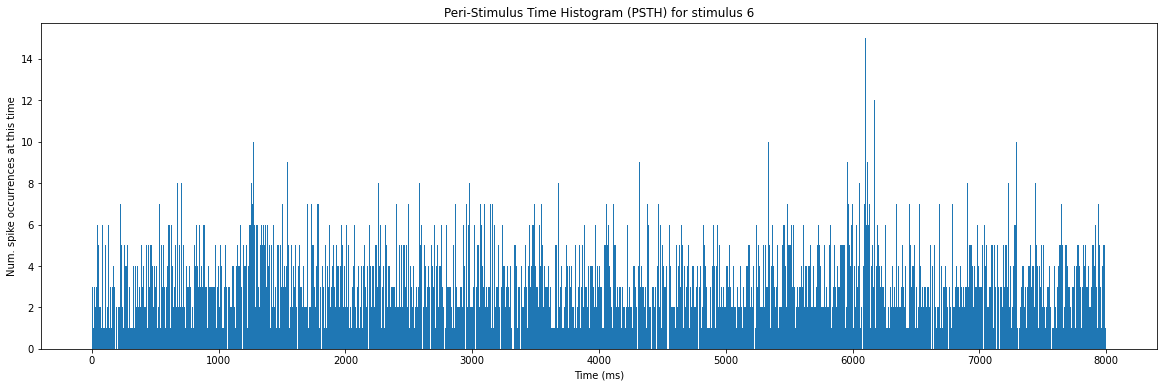

abolqasemi dataset\SpikeActBZ1.mat


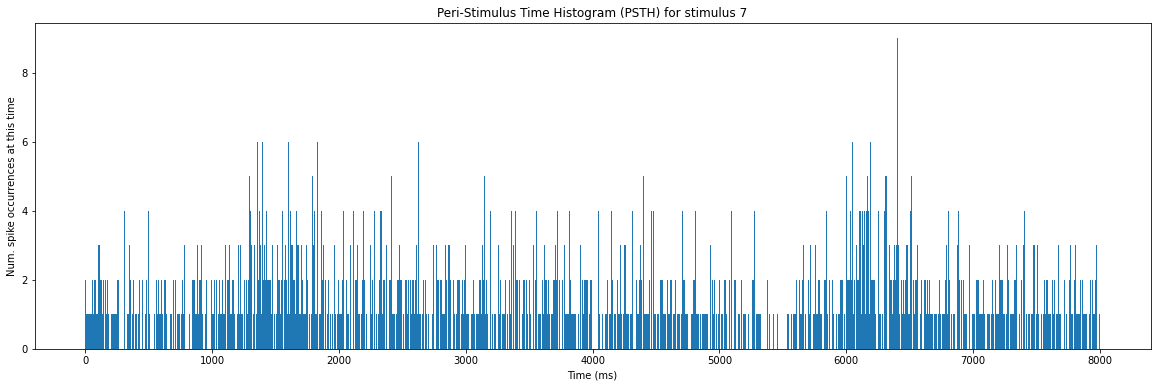

abolqasemi dataset\SpikeActBZ11.mat


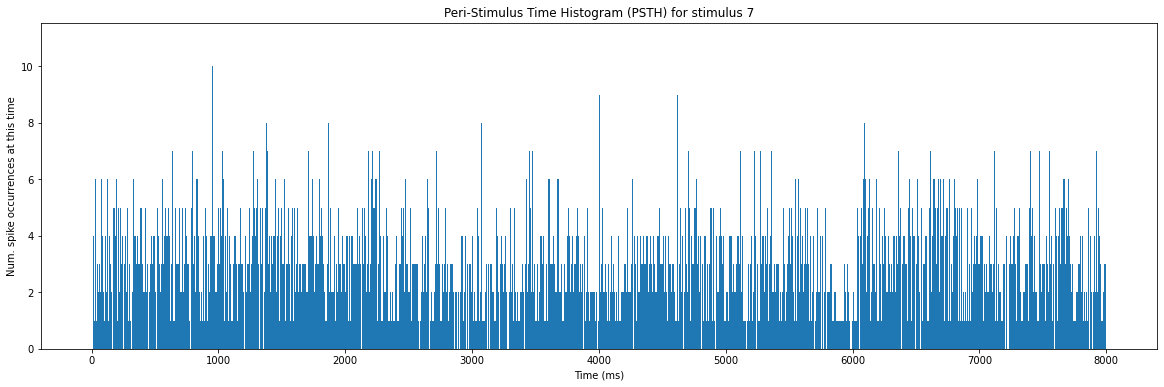

abolqasemi dataset\SpikeActBZ13.mat


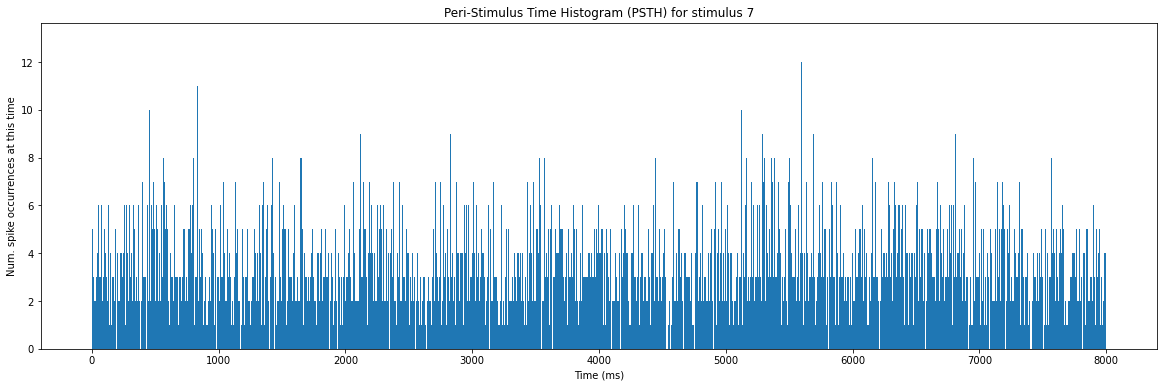

abolqasemi dataset\SpikeActBZ2.mat


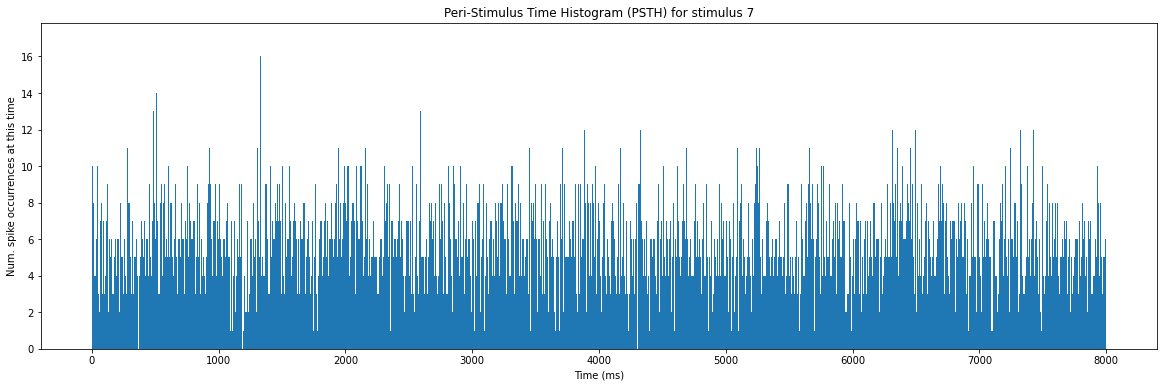

abolqasemi dataset\SpikeActBZ3.mat


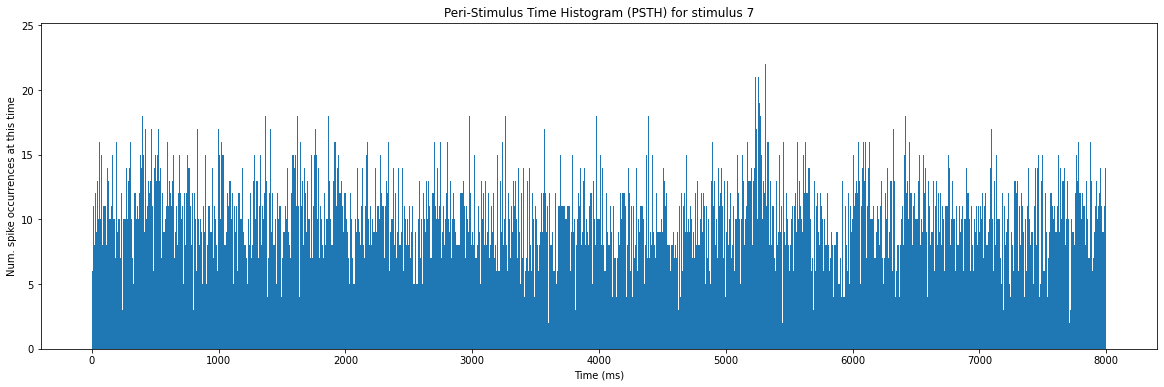

abolqasemi dataset\SpikeActBZ5.mat


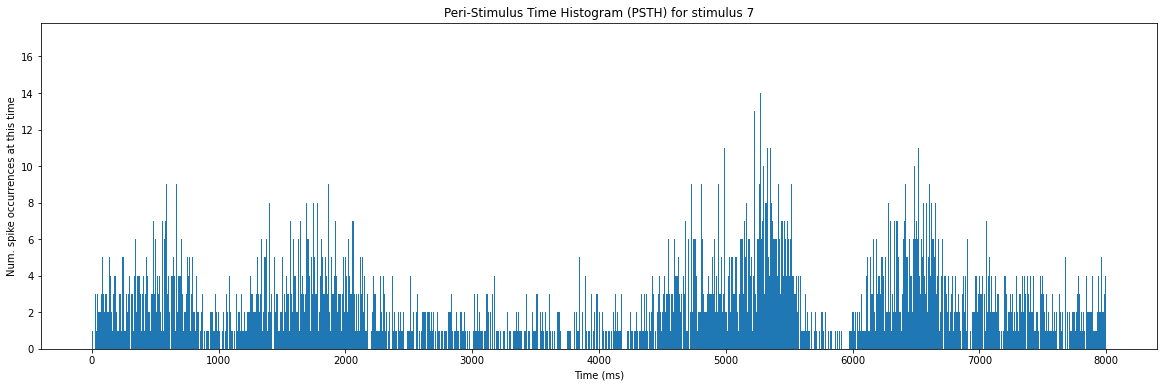

abolqasemi dataset\SpikeActBZ8.mat


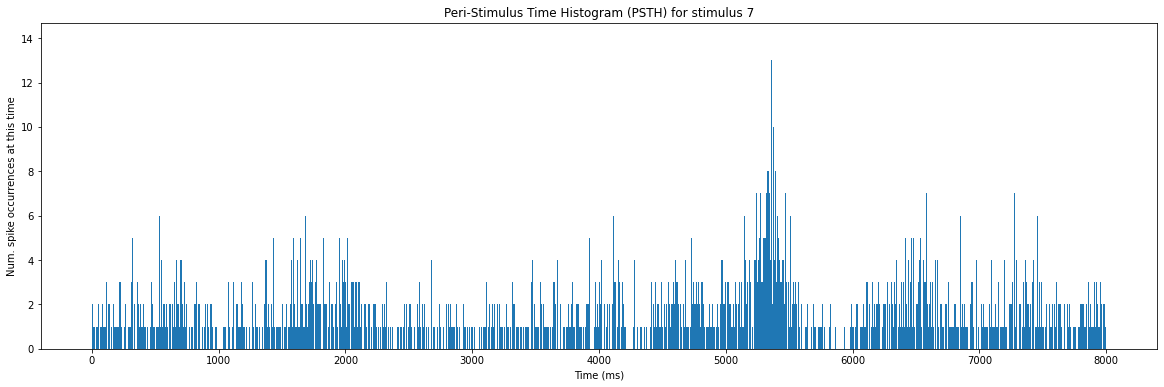

abolqasemi dataset\SpikeActBZ9.mat


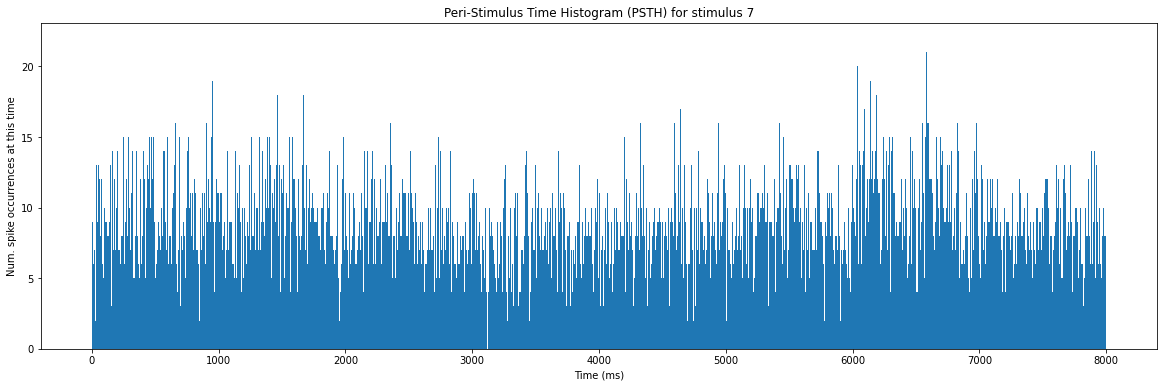

abolqasemi dataset\SpikeActBZ9.mat


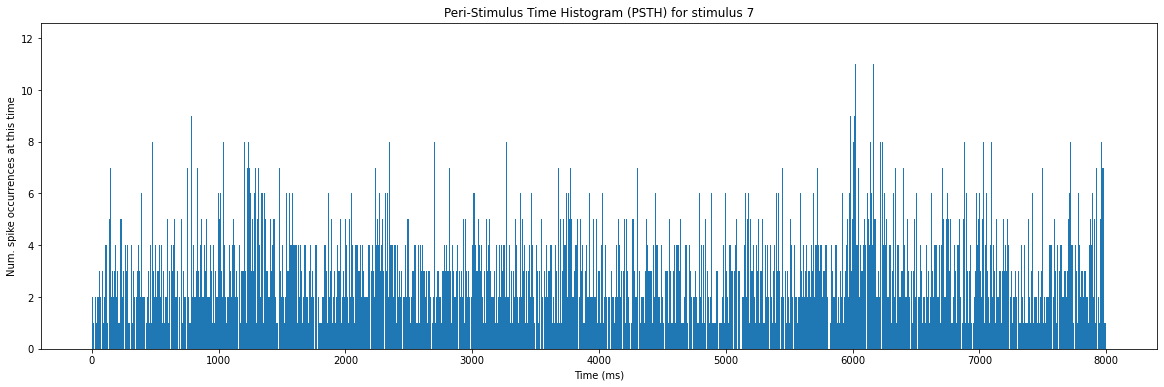

abolqasemi dataset\SpikeActBZ1.mat


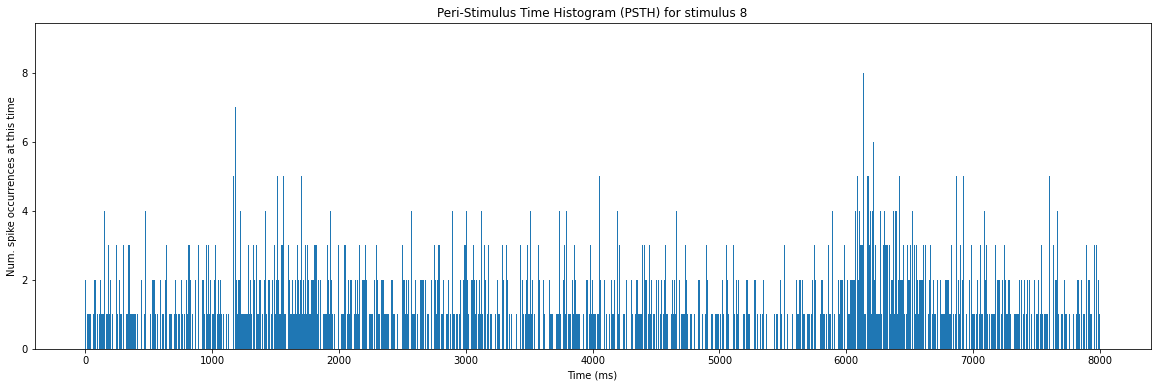

abolqasemi dataset\SpikeActBZ11.mat


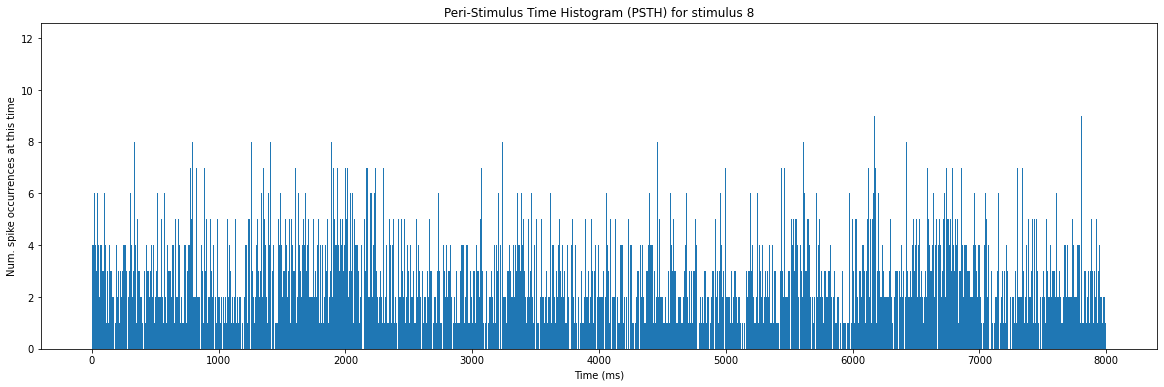

abolqasemi dataset\SpikeActBZ13.mat


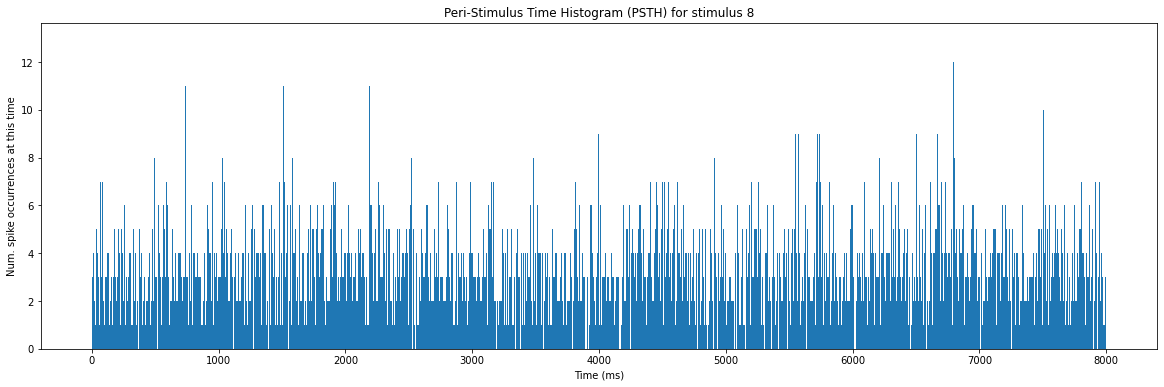

abolqasemi dataset\SpikeActBZ2.mat


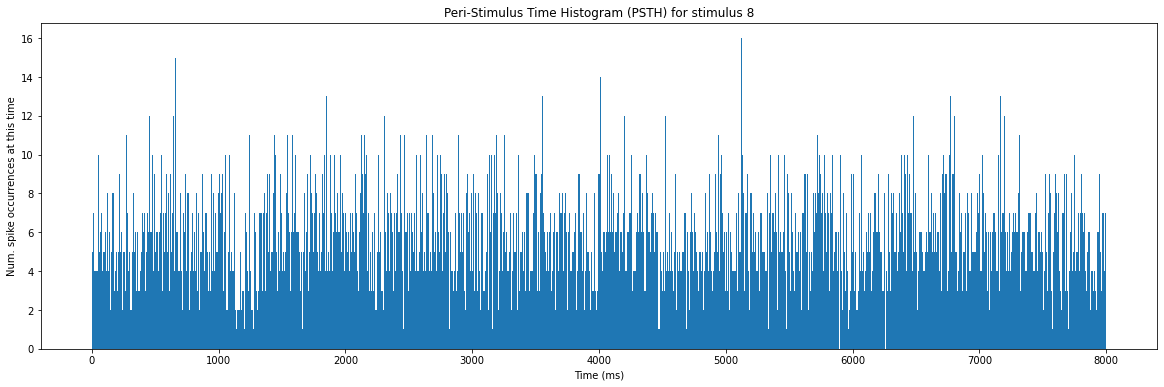

abolqasemi dataset\SpikeActBZ3.mat


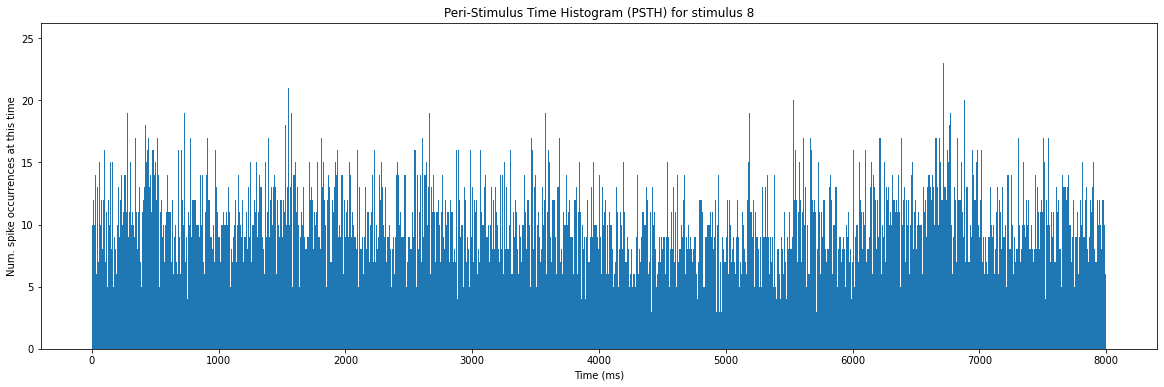

abolqasemi dataset\SpikeActBZ5.mat


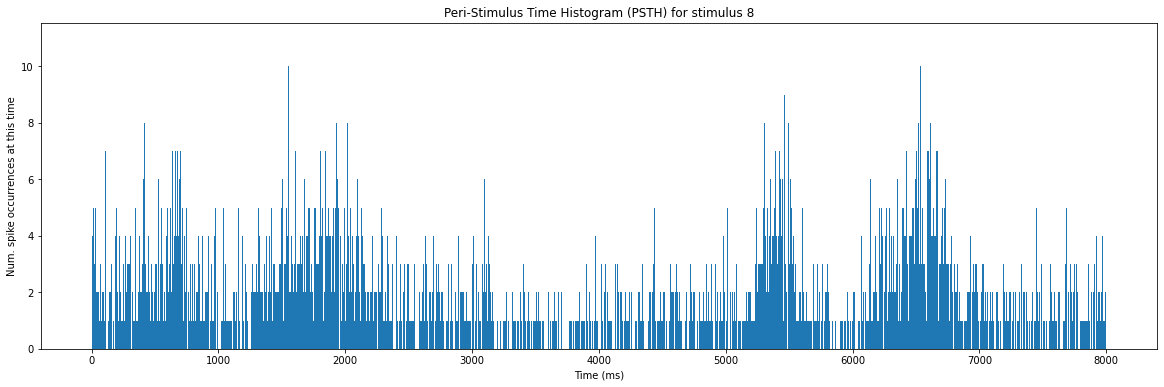

abolqasemi dataset\SpikeActBZ8.mat


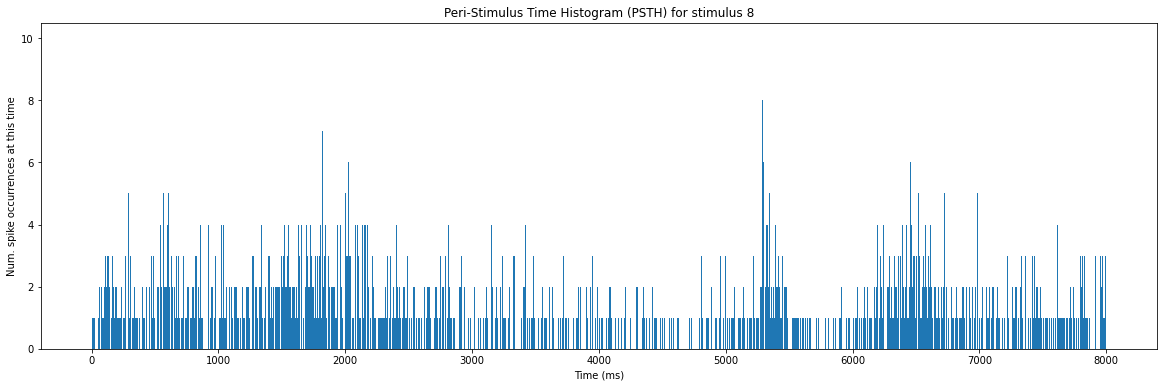

abolqasemi dataset\SpikeActBZ9.mat


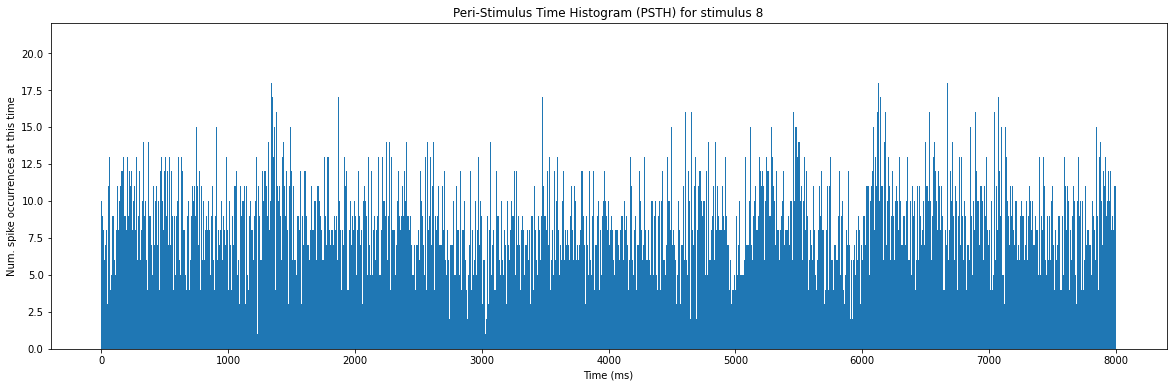

abolqasemi dataset\SpikeActBZ9.mat


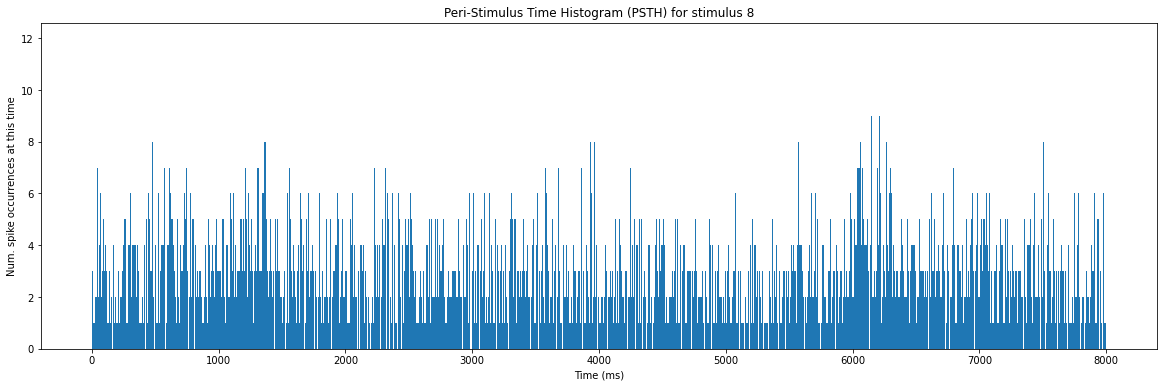

In [9]:
stims =[]
for i in range(8):
        s = plot_psth(i)
        stims.append(s)

## Firing Rate

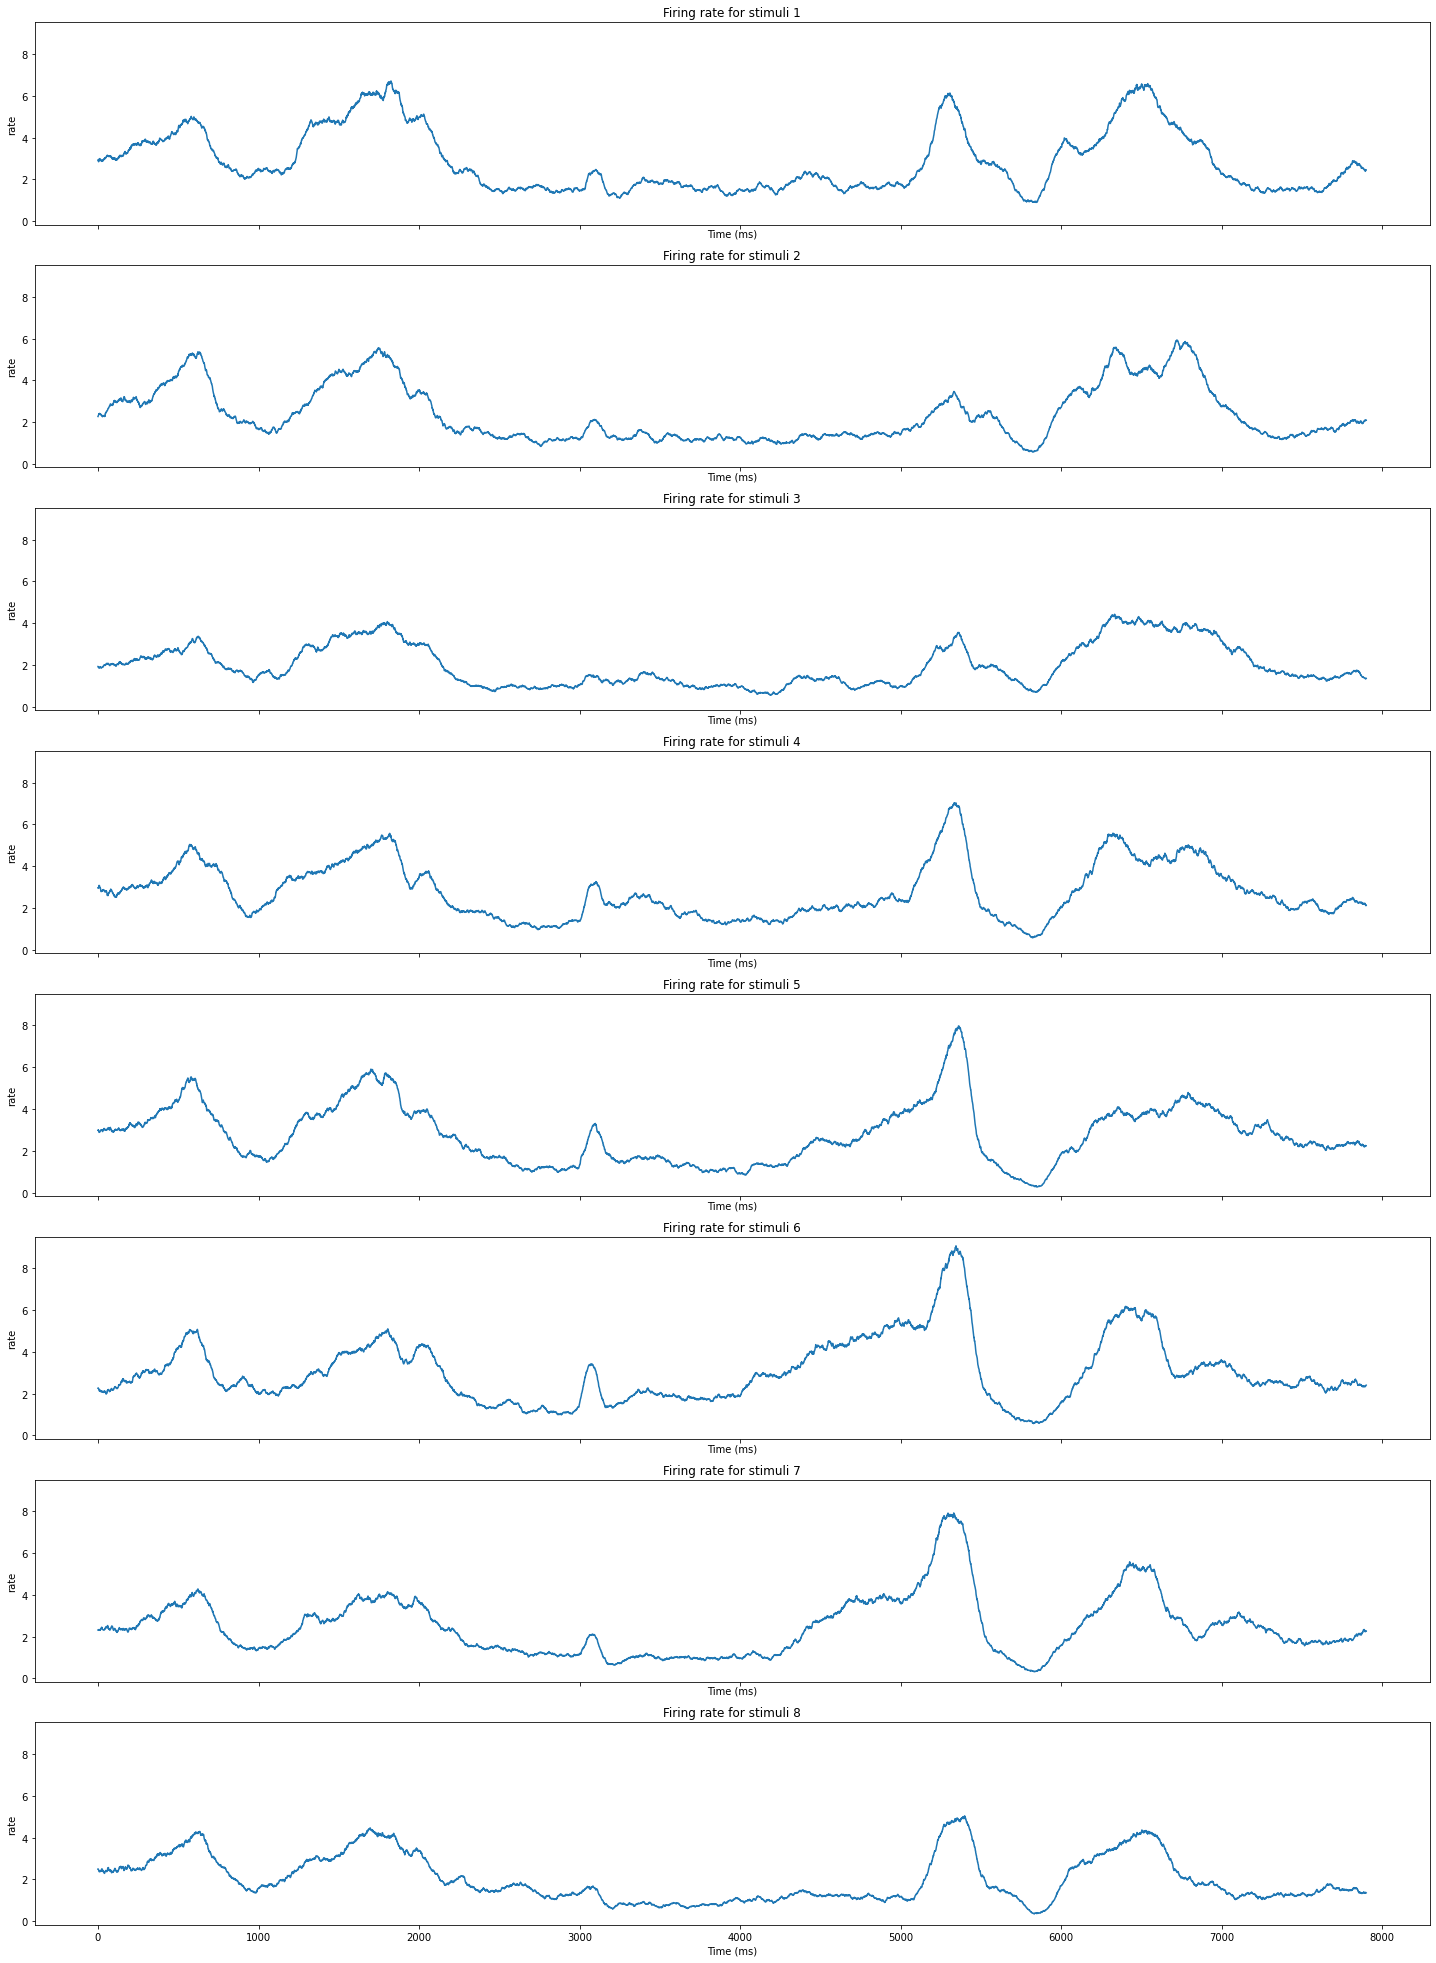

In [10]:
fig, axs = plt.subplots(8, sharex=True, sharey=True, figsize=(25, 35))
for i in range(8):
    stim1 = np.sum(stims[i][5], 0)
    axs[i].plot(np.convolve(stim1,np.ones(100,dtype=int)/100,'valid'))
    axs[i].set_ylabel("rate")
    axs[i].set_title(f"Firing rate for stimuli {i+1}")
    axs[i].set_xlabel("Time (ms)")
plt.show()

# Most Informative

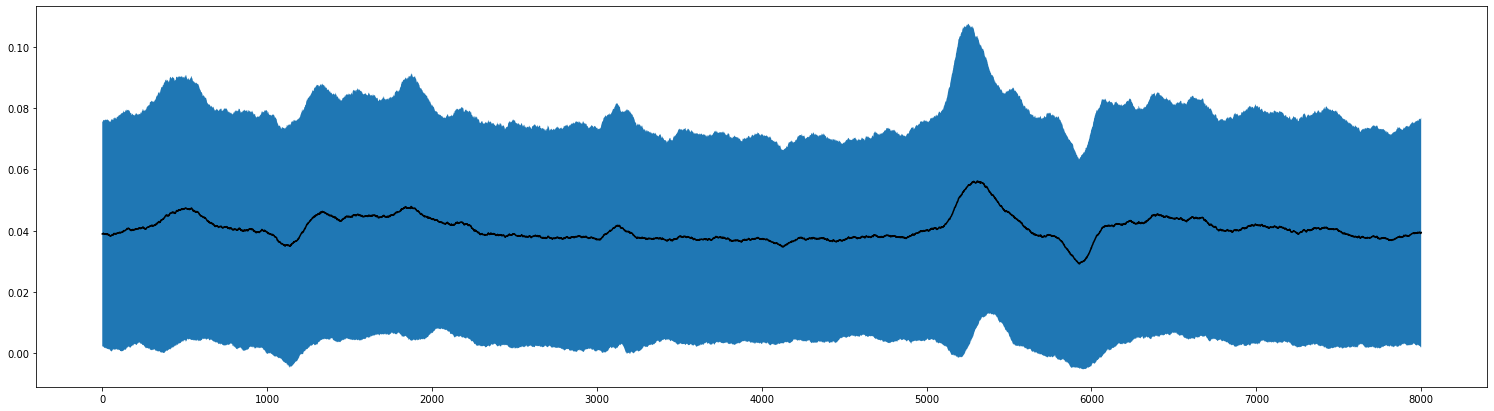

In [11]:
stim_num = 6
files = glob.glob('abolqasemi dataset\Spike*.mat')
neuron = spio.loadmat(files[0])
neuron = neuron['su']
if neuron.shape[0] != 0:
    spikes = neuron[0][0]
    stim =spikes[stim_indexes[stim_num], :]
for file in files[1:]:
    neuron = spio.loadmat(file)
    neuron = neuron['su']
    if neuron.shape[0] != 0:
        spikes = neuron[0][0]
        stim = np.vstack((stim,spikes[stim_indexes[stim_num], :] ))
        if file == files[-1]:
            spikes = neuron[0][1]
            stim = np.vstack((stim,spikes[stim_indexes[stim_num], :] ))

fi_rate = []
for t in range(stim.shape[0]):
    fi_rate.append(np.convolve(stim[t],np.ones(100,dtype=int)/100,'valid'))
fi_mean = np.mean(np.array(fi_rate),0)
fi_std = np.std(np.array(fi_rate),0, ddof=1)
stim_ra = np.linspace(0, 8000, len(fi_mean))
plt.figure(figsize=(26, 7))
plt.plot(stim_ra, fi_mean, 'k-')
plt.fill_between(stim_ra,  fi_mean-fi_std, fi_mean+fi_std)
plt.show()

## Least Informative

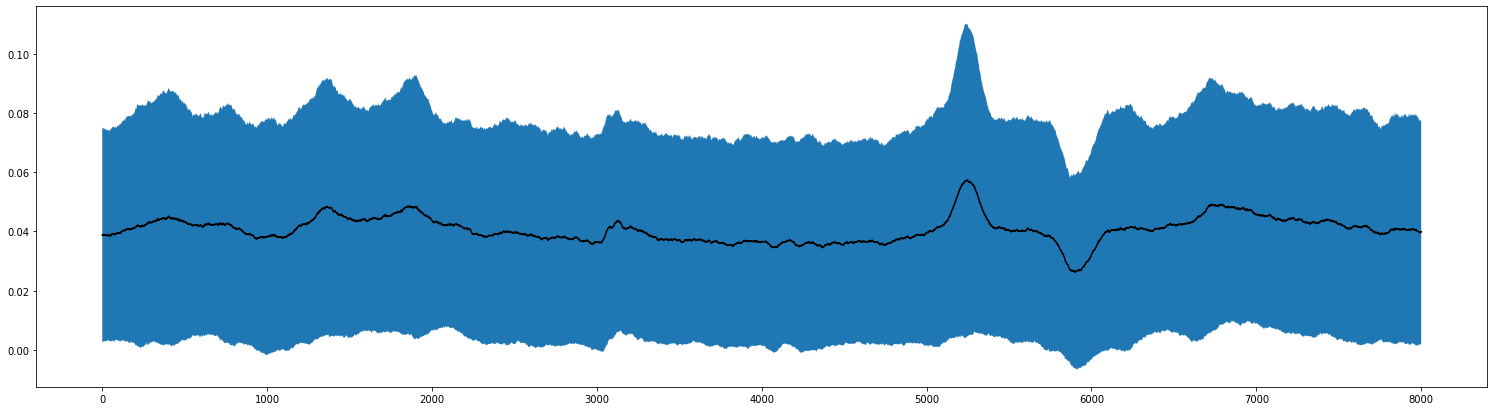

In [12]:
stim_num = 2
files = glob.glob('abolqasemi dataset\Spike*.mat')
neuron = spio.loadmat(files[0])
neuron = neuron['su']
if neuron.shape[0] != 0:
    spikes = neuron[0][0]
    stim =spikes[stim_indexes[stim_num], :]
for file in files[1:]:
    neuron = spio.loadmat(file)
    neuron = neuron['su']
    if neuron.shape[0] != 0:
        spikes = neuron[0][0]
        stim = np.vstack((stim,spikes[stim_indexes[stim_num], :] ))
        if file == files[-1]:
            spikes = neuron[0][1]
            stim = np.vstack((stim,spikes[stim_indexes[stim_num], :] ))

fi_rate = []
for t in range(stim.shape[0]):
    fi_rate.append(np.convolve(stim[t],np.ones(100,dtype=int)/100,'valid'))
fi2_mean = np.mean(np.array(fi_rate),0)
fi_std = np.std(np.array(fi_rate),0, ddof=1)
stim_ra = np.linspace(0, 8000, len(fi2_mean))
plt.figure(figsize=(26, 7))
plt.plot(stim_ra, fi2_mean, 'k-')
plt.fill_between(stim_ra,  fi2_mean-fi_std, fi2_mean+fi_std)
plt.show()

### Significance: Cross-Correlation

In [18]:
from scipy.signal import correlate
def plot_xcorr(x, y): 
    "Plot cross-correlation (full) between two signals."
    N = max(len(x), len(y)) 
    n = min(len(x), len(y)) 

    if N == len(y): 
        lags = np.arange(-N + 1, n) 
    else: 
        lags = np.arange(-n + 1, N) 
    c = correlate(x / np.std(x), y / np.std(y), 'full') 

    plt.figure(figsize=(15, 7))
    plt.plot(lags, c / n) 
    plt.xlabel("lags")
    plt.ylabel("correlation")
    plt.title("Cross-Correlation of two signals")
    plt.show() 

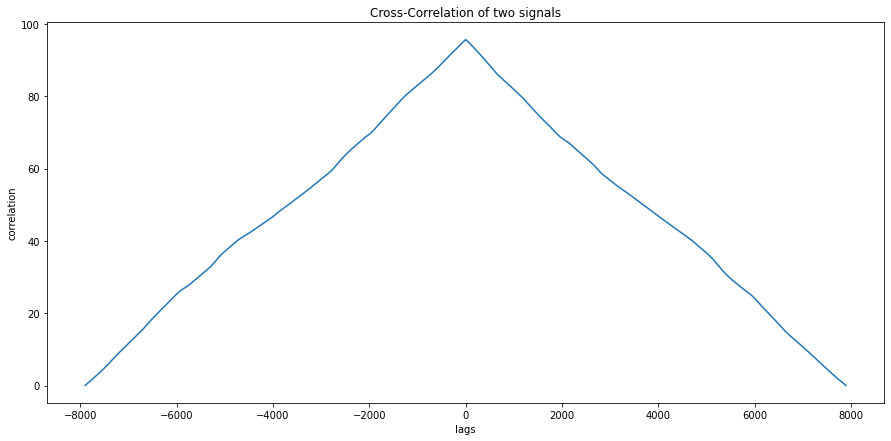

In [19]:
plot_xcorr(fi_mean, fi2_mean)